<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Face-Generation" data-toc-modified-id="Face-Generation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Face Generation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Get-the-Data" data-toc-modified-id="Get-the-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Get the Data</a></span></li></ul></li><li><span><a href="#Explore-the-Data" data-toc-modified-id="Explore-the-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explore the Data</a></span><ul class="toc-item"><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CelebA" data-toc-modified-id="CelebA-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>CelebA</a></span></li></ul></li><li><span><a href="#Preprocess-the-Data" data-toc-modified-id="Preprocess-the-Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocess the Data</a></span></li><li><span><a href="#Build-the-Neural-Network" data-toc-modified-id="Build-the-Neural-Network-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Build the Neural Network</a></span><ul class="toc-item"><li><span><a href="#Check-the-Version-of-TensorFlow-and-Access-to-GPU" data-toc-modified-id="Check-the-Version-of-TensorFlow-and-Access-to-GPU-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Check the Version of TensorFlow and Access to GPU</a></span></li><li><span><a href="#Input" data-toc-modified-id="Input-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Input</a></span></li><li><span><a href="#Discriminator" data-toc-modified-id="Discriminator-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Discriminator</a></span></li><li><span><a href="#Generator" data-toc-modified-id="Generator-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Generator</a></span></li><li><span><a href="#Loss" data-toc-modified-id="Loss-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Loss</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Optimization</a></span></li></ul></li><li><span><a href="#Neural-Network-Training" data-toc-modified-id="Neural-Network-Training-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Neural Network Training</a></span><ul class="toc-item"><li><span><a href="#Show-Output" data-toc-modified-id="Show-Output-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Show Output</a></span></li><li><span><a href="#Train" data-toc-modified-id="Train-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#MNIST" data-toc-modified-id="MNIST-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>MNIST</a></span></li><li><span><a href="#CelebA" data-toc-modified-id="CelebA-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>CelebA</a></span></li><li><span><a href="#Submitting-This-Project" data-toc-modified-id="Submitting-This-Project-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Submitting This Project</a></span></li></ul></li></ul></li></ul></div>

# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [25]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

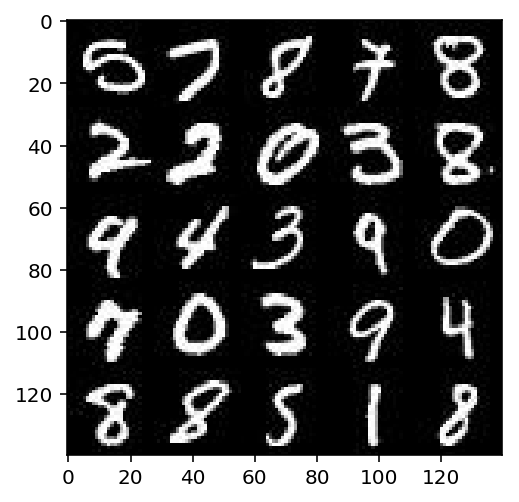

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

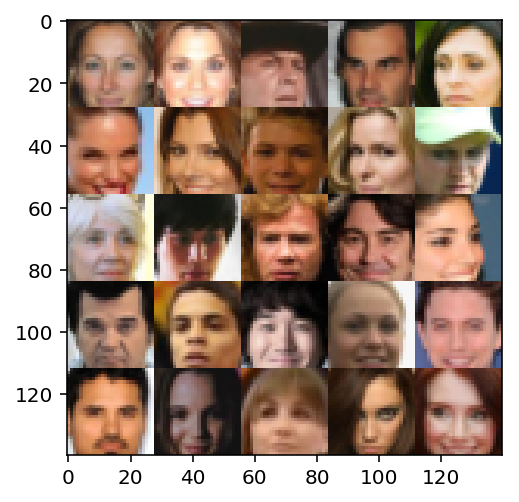

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [52]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_images')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    lr = tf.placeholder(tf.float32)
    rate = tf.placeholder(tf.float32)
    return input_images, input_z, lr, rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_inputs(model_inputs)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [83]:
def discriminator(images, rate, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x1 = tf.layers.dropout(x1, rate)
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x2 = tf.layers.dropout(x2, rate)
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x3 = tf.layers.dropout(x3, rate)
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)
        
        return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_discriminator(discriminator, tf)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [53]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.1

    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 3*3*512)
        # Reshape it to start the convoulutional stack
        x1 = tf.reshape(x1, (-1, 3, 3, 512))
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        # 3x3x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 64, 5, strides=1, padding='valid', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        # 7x7x64 now
        
        x3 = tf.layers.conv2d_transpose(x2, 32, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        # 14x14x32 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer_conv2d())
        # 28x28x3 now
        
        output = tf.tanh(logits) * 0.5
        
        return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [66]:
import numpy as np
def model_loss(input_real, input_z, rate, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param rate: Dropout rate
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, rate)
    d_model_fake, d_logits_fake = discriminator(g_model, rate, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels = tf.ones_like(d_logits_real) * np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake) * np.random.uniform(0.0, 0.2)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
#tests.test_model_loss(model_loss)

"\nDON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE\n"

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [67]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and biad to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
 
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [68]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [88]:
def train(epoch_count, batch_size, z_dim, learning_rate, dp_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param rate: Dropout rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    losses = []
    steps = 0
    
    if data_image_mode == 'L':
        out_channel_dim = 1;
    else:
        out_channel_dim = 3;
    
    input_real, input_z, lr, rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, rate, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run optimizers    
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate, rate: dp_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate, rate: dp_rate})
                
                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z, lr: learning_rate, rate: dp_rate})
                    train_loss_g = g_loss.eval({input_z: batch_z, lr: learning_rate, rate: dp_rate})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))
                    
                if steps % 100 == 0:
                    show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
     
    return losses

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5014... Generator Loss: 4.6654
Epoch 1/2... Discriminator Loss: 0.7089... Generator Loss: 7.8851
Epoch 1/2... Discriminator Loss: 0.6667... Generator Loss: 10.3718
Epoch 1/2... Discriminator Loss: 2.1033... Generator Loss: 10.9669
Epoch 1/2... Discriminator Loss: 0.5650... Generator Loss: 4.8757
Epoch 1/2... Discriminator Loss: 0.8315... Generator Loss: 4.6726
Epoch 1/2... Discriminator Loss: 0.5472... Generator Loss: 3.5157
Epoch 1/2... Discriminator Loss: 0.5662... Generator Loss: 3.8074
Epoch 1/2... Discriminator Loss: 0.5523... Generator Loss: 4.0047
Epoch 1/2... Discriminator Loss: 0.5397... Generator Loss: 3.6417


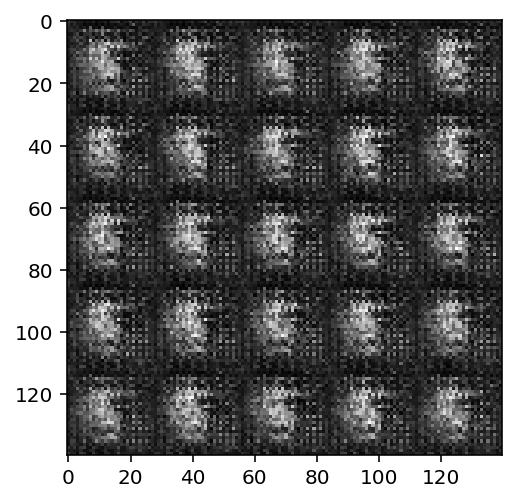

Epoch 1/2... Discriminator Loss: 0.5372... Generator Loss: 3.0957
Epoch 1/2... Discriminator Loss: 0.5133... Generator Loss: 3.9685
Epoch 1/2... Discriminator Loss: 0.5060... Generator Loss: 3.9519
Epoch 1/2... Discriminator Loss: 0.5140... Generator Loss: 3.8539
Epoch 1/2... Discriminator Loss: 0.5227... Generator Loss: 3.3429
Epoch 1/2... Discriminator Loss: 0.5075... Generator Loss: 4.2933
Epoch 1/2... Discriminator Loss: 0.5071... Generator Loss: 3.4551
Epoch 1/2... Discriminator Loss: 0.8026... Generator Loss: 6.4360
Epoch 1/2... Discriminator Loss: 0.5218... Generator Loss: 3.6740
Epoch 1/2... Discriminator Loss: 0.5435... Generator Loss: 2.9715


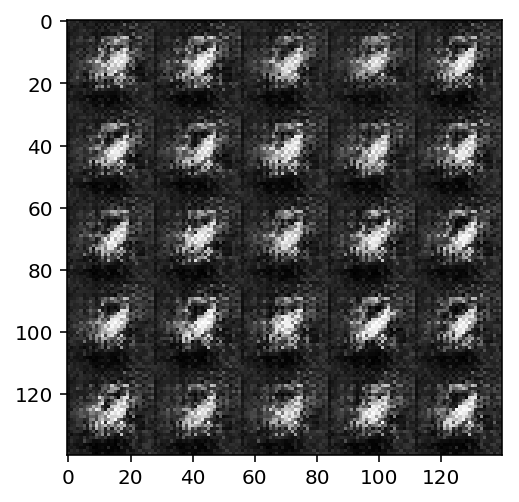

Epoch 1/2... Discriminator Loss: 0.5375... Generator Loss: 3.2564
Epoch 1/2... Discriminator Loss: 0.5508... Generator Loss: 3.1222
Epoch 1/2... Discriminator Loss: 0.5608... Generator Loss: 2.8037
Epoch 1/2... Discriminator Loss: 0.5735... Generator Loss: 4.0614
Epoch 1/2... Discriminator Loss: 0.8905... Generator Loss: 3.9013
Epoch 1/2... Discriminator Loss: 0.5829... Generator Loss: 3.6754
Epoch 1/2... Discriminator Loss: 0.5954... Generator Loss: 2.4956
Epoch 1/2... Discriminator Loss: 0.9159... Generator Loss: 1.8682
Epoch 1/2... Discriminator Loss: 0.5635... Generator Loss: 2.9237
Epoch 1/2... Discriminator Loss: 0.8099... Generator Loss: 1.6276


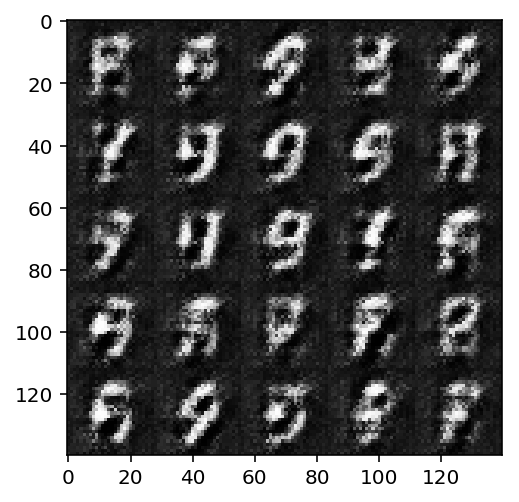

Epoch 1/2... Discriminator Loss: 0.6621... Generator Loss: 2.5896
Epoch 1/2... Discriminator Loss: 0.6787... Generator Loss: 1.8432
Epoch 1/2... Discriminator Loss: 0.6212... Generator Loss: 2.3075
Epoch 1/2... Discriminator Loss: 1.3733... Generator Loss: 0.8991
Epoch 1/2... Discriminator Loss: 0.7449... Generator Loss: 1.7070
Epoch 1/2... Discriminator Loss: 0.7983... Generator Loss: 3.2348
Epoch 1/2... Discriminator Loss: 0.7548... Generator Loss: 2.0031
Epoch 1/2... Discriminator Loss: 0.6877... Generator Loss: 3.9159
Epoch 1/2... Discriminator Loss: 0.6273... Generator Loss: 2.1408
Epoch 1/2... Discriminator Loss: 0.6316... Generator Loss: 3.4043


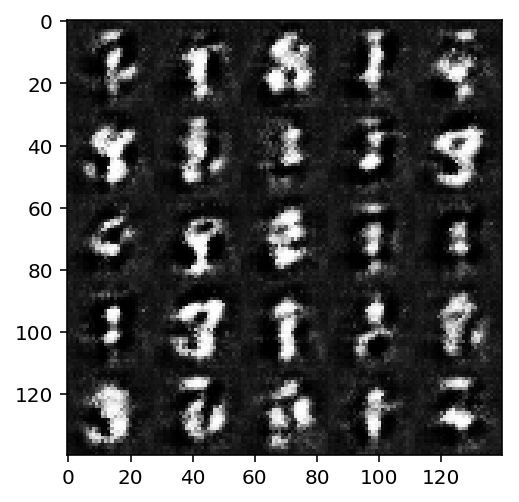

Epoch 1/2... Discriminator Loss: 0.6074... Generator Loss: 2.5963
Epoch 1/2... Discriminator Loss: 0.9695... Generator Loss: 1.2388
Epoch 1/2... Discriminator Loss: 0.6218... Generator Loss: 2.0601
Epoch 1/2... Discriminator Loss: 0.6798... Generator Loss: 1.9427
Epoch 1/2... Discriminator Loss: 0.6139... Generator Loss: 3.1111
Epoch 1/2... Discriminator Loss: 0.6971... Generator Loss: 1.8632
Epoch 1/2... Discriminator Loss: 0.6390... Generator Loss: 2.3307
Epoch 1/2... Discriminator Loss: 0.7789... Generator Loss: 1.5412
Epoch 1/2... Discriminator Loss: 0.8110... Generator Loss: 1.5002
Epoch 1/2... Discriminator Loss: 0.5909... Generator Loss: 3.1089


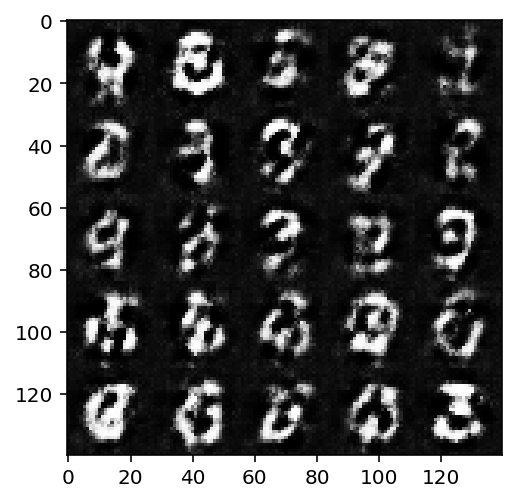

Epoch 1/2... Discriminator Loss: 0.6723... Generator Loss: 3.0711
Epoch 1/2... Discriminator Loss: 0.9448... Generator Loss: 1.1388
Epoch 1/2... Discriminator Loss: 0.7179... Generator Loss: 1.6827
Epoch 1/2... Discriminator Loss: 0.6384... Generator Loss: 2.3243
Epoch 1/2... Discriminator Loss: 0.7230... Generator Loss: 2.2451
Epoch 1/2... Discriminator Loss: 0.6184... Generator Loss: 2.2137
Epoch 1/2... Discriminator Loss: 1.0146... Generator Loss: 1.1478
Epoch 1/2... Discriminator Loss: 0.5802... Generator Loss: 2.5765
Epoch 1/2... Discriminator Loss: 1.9024... Generator Loss: 5.8195
Epoch 1/2... Discriminator Loss: 0.6091... Generator Loss: 2.5536


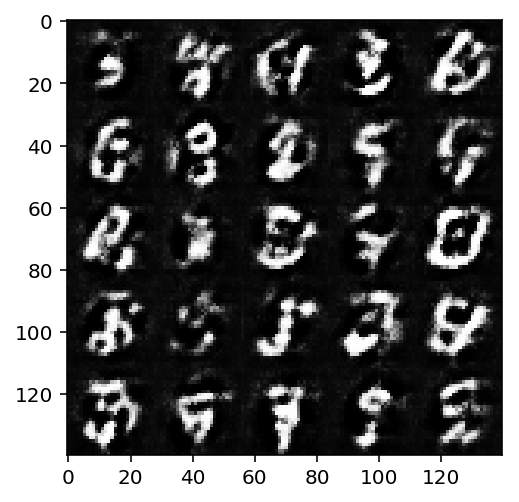

Epoch 1/2... Discriminator Loss: 0.6539... Generator Loss: 3.0746
Epoch 1/2... Discriminator Loss: 0.7768... Generator Loss: 1.5331
Epoch 1/2... Discriminator Loss: 0.8678... Generator Loss: 1.2640
Epoch 1/2... Discriminator Loss: 0.6942... Generator Loss: 3.2413
Epoch 1/2... Discriminator Loss: 0.6286... Generator Loss: 2.4540
Epoch 1/2... Discriminator Loss: 0.6223... Generator Loss: 2.3942
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 2.6193
Epoch 1/2... Discriminator Loss: 0.6517... Generator Loss: 2.1241
Epoch 1/2... Discriminator Loss: 0.6651... Generator Loss: 1.9847
Epoch 1/2... Discriminator Loss: 1.0434... Generator Loss: 1.2423


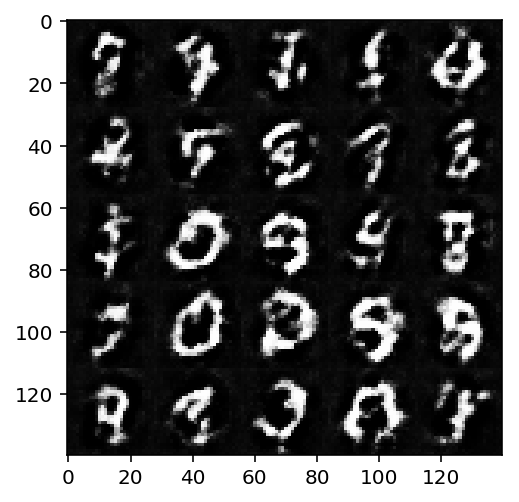

Epoch 1/2... Discriminator Loss: 0.6062... Generator Loss: 2.6895
Epoch 1/2... Discriminator Loss: 0.8261... Generator Loss: 1.4259
Epoch 1/2... Discriminator Loss: 0.9226... Generator Loss: 1.1698
Epoch 1/2... Discriminator Loss: 0.9566... Generator Loss: 3.7802
Epoch 1/2... Discriminator Loss: 0.6773... Generator Loss: 2.4756
Epoch 1/2... Discriminator Loss: 0.6985... Generator Loss: 3.0017
Epoch 1/2... Discriminator Loss: 0.6290... Generator Loss: 2.4312
Epoch 1/2... Discriminator Loss: 0.8084... Generator Loss: 1.4443
Epoch 1/2... Discriminator Loss: 0.7448... Generator Loss: 1.5795
Epoch 1/2... Discriminator Loss: 0.7038... Generator Loss: 3.3839


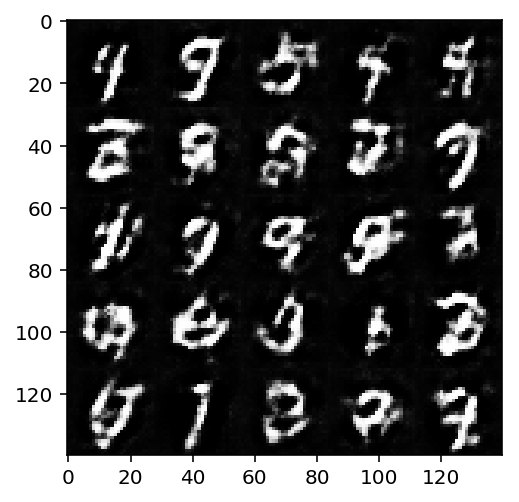

Epoch 1/2... Discriminator Loss: 0.6719... Generator Loss: 1.9739
Epoch 1/2... Discriminator Loss: 0.7940... Generator Loss: 1.4611
Epoch 1/2... Discriminator Loss: 0.7160... Generator Loss: 2.7715
Epoch 1/2... Discriminator Loss: 0.7167... Generator Loss: 2.0976
Epoch 1/2... Discriminator Loss: 0.6963... Generator Loss: 1.8868
Epoch 1/2... Discriminator Loss: 0.7643... Generator Loss: 1.6029
Epoch 1/2... Discriminator Loss: 0.9350... Generator Loss: 1.2485
Epoch 1/2... Discriminator Loss: 0.7789... Generator Loss: 2.5512
Epoch 1/2... Discriminator Loss: 0.7840... Generator Loss: 1.4656
Epoch 1/2... Discriminator Loss: 0.8173... Generator Loss: 1.4740


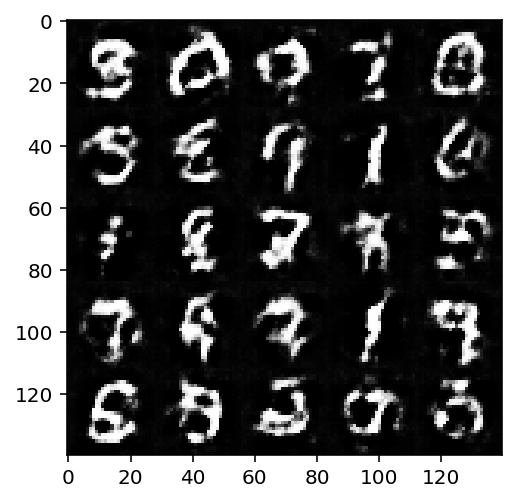

Epoch 1/2... Discriminator Loss: 0.9567... Generator Loss: 1.1675
Epoch 1/2... Discriminator Loss: 0.6534... Generator Loss: 2.0274
Epoch 1/2... Discriminator Loss: 0.8702... Generator Loss: 1.2493
Epoch 1/2... Discriminator Loss: 1.0716... Generator Loss: 1.1390
Epoch 1/2... Discriminator Loss: 0.9147... Generator Loss: 1.1391
Epoch 1/2... Discriminator Loss: 0.7236... Generator Loss: 1.7195
Epoch 1/2... Discriminator Loss: 0.6933... Generator Loss: 3.2102
Epoch 1/2... Discriminator Loss: 0.9464... Generator Loss: 1.2251
Epoch 1/2... Discriminator Loss: 0.7147... Generator Loss: 2.0452
Epoch 1/2... Discriminator Loss: 0.7808... Generator Loss: 1.5291


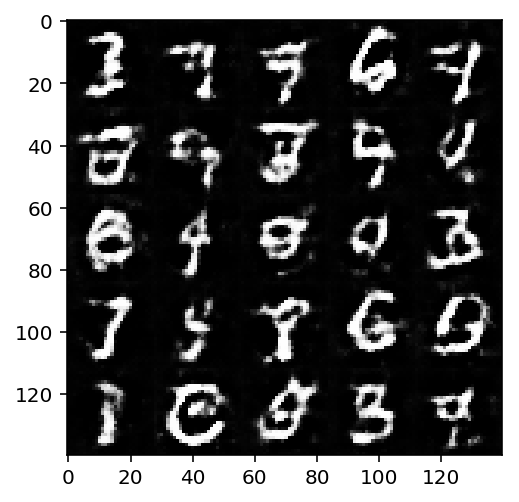

Epoch 1/2... Discriminator Loss: 1.0959... Generator Loss: 1.0530
Epoch 1/2... Discriminator Loss: 1.2430... Generator Loss: 0.7776
Epoch 1/2... Discriminator Loss: 0.7792... Generator Loss: 1.7245
Epoch 1/2... Discriminator Loss: 1.1605... Generator Loss: 0.8195
Epoch 1/2... Discriminator Loss: 0.7678... Generator Loss: 2.4974
Epoch 1/2... Discriminator Loss: 1.6697... Generator Loss: 0.5428
Epoch 1/2... Discriminator Loss: 0.7707... Generator Loss: 1.5883
Epoch 1/2... Discriminator Loss: 0.9482... Generator Loss: 1.1121
Epoch 1/2... Discriminator Loss: 0.9015... Generator Loss: 1.2327
Epoch 1/2... Discriminator Loss: 0.8808... Generator Loss: 2.6681


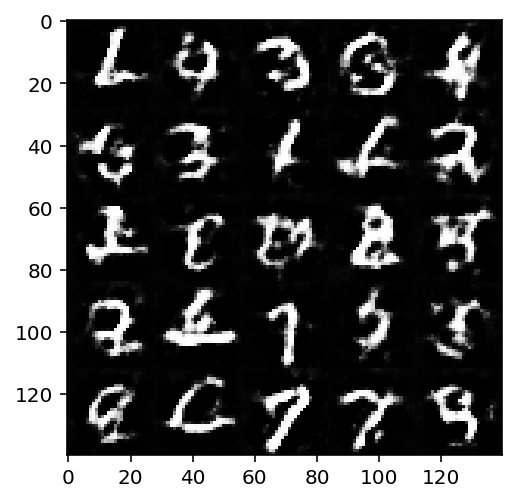

Epoch 1/2... Discriminator Loss: 0.9122... Generator Loss: 1.1956
Epoch 1/2... Discriminator Loss: 0.6955... Generator Loss: 2.3583
Epoch 1/2... Discriminator Loss: 0.7792... Generator Loss: 1.4852
Epoch 1/2... Discriminator Loss: 1.2158... Generator Loss: 0.9408
Epoch 1/2... Discriminator Loss: 0.8089... Generator Loss: 1.7557
Epoch 1/2... Discriminator Loss: 0.8306... Generator Loss: 1.4113
Epoch 1/2... Discriminator Loss: 0.8539... Generator Loss: 1.2449
Epoch 1/2... Discriminator Loss: 0.8155... Generator Loss: 1.4184
Epoch 1/2... Discriminator Loss: 0.8093... Generator Loss: 1.4260
Epoch 1/2... Discriminator Loss: 0.8112... Generator Loss: 1.4041


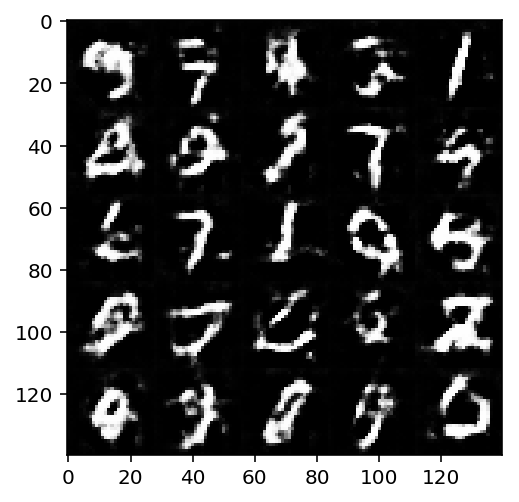

Epoch 1/2... Discriminator Loss: 1.2542... Generator Loss: 0.8774
Epoch 1/2... Discriminator Loss: 0.8660... Generator Loss: 1.2162
Epoch 1/2... Discriminator Loss: 0.7409... Generator Loss: 1.6210
Epoch 1/2... Discriminator Loss: 0.8278... Generator Loss: 1.2759
Epoch 1/2... Discriminator Loss: 0.9289... Generator Loss: 1.1871
Epoch 1/2... Discriminator Loss: 0.8593... Generator Loss: 1.2830
Epoch 1/2... Discriminator Loss: 0.7470... Generator Loss: 1.5907
Epoch 1/2... Discriminator Loss: 0.7706... Generator Loss: 1.6162
Epoch 1/2... Discriminator Loss: 0.7502... Generator Loss: 1.8062
Epoch 1/2... Discriminator Loss: 0.8107... Generator Loss: 1.3782


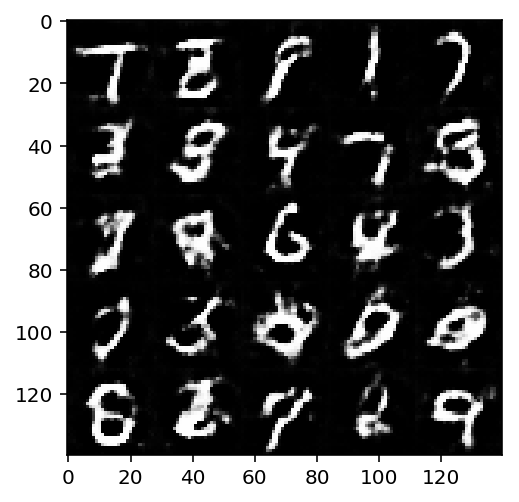

Epoch 1/2... Discriminator Loss: 0.7486... Generator Loss: 1.8374
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 2.4841
Epoch 1/2... Discriminator Loss: 0.8893... Generator Loss: 1.2146
Epoch 1/2... Discriminator Loss: 1.3231... Generator Loss: 3.4276
Epoch 1/2... Discriminator Loss: 0.7599... Generator Loss: 1.6005
Epoch 1/2... Discriminator Loss: 0.6937... Generator Loss: 2.1818
Epoch 1/2... Discriminator Loss: 0.7007... Generator Loss: 2.1040
Epoch 1/2... Discriminator Loss: 0.7944... Generator Loss: 1.4181
Epoch 1/2... Discriminator Loss: 0.8564... Generator Loss: 1.2798
Epoch 1/2... Discriminator Loss: 0.6502... Generator Loss: 1.9660


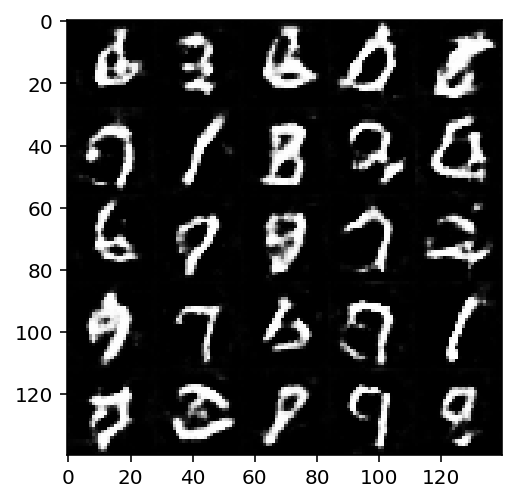

Epoch 1/2... Discriminator Loss: 0.9402... Generator Loss: 2.7765
Epoch 1/2... Discriminator Loss: 0.7072... Generator Loss: 2.1564
Epoch 1/2... Discriminator Loss: 0.8238... Generator Loss: 1.3731
Epoch 1/2... Discriminator Loss: 0.7719... Generator Loss: 1.5327
Epoch 1/2... Discriminator Loss: 0.7349... Generator Loss: 1.6778
Epoch 1/2... Discriminator Loss: 0.8327... Generator Loss: 1.3007
Epoch 1/2... Discriminator Loss: 0.9580... Generator Loss: 1.0781
Epoch 1/2... Discriminator Loss: 0.8783... Generator Loss: 1.3420
Epoch 1/2... Discriminator Loss: 0.8504... Generator Loss: 1.2477
Epoch 1/2... Discriminator Loss: 0.9864... Generator Loss: 1.0468


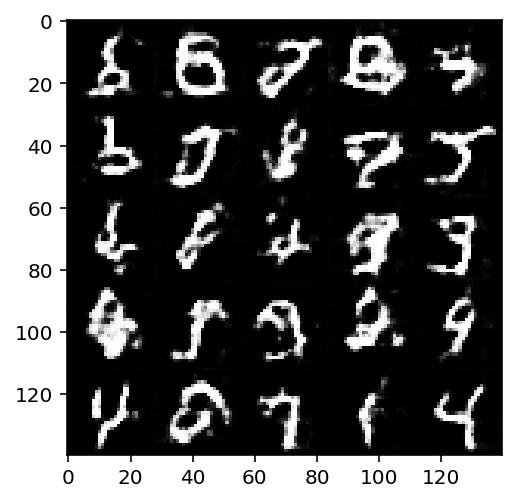

Epoch 1/2... Discriminator Loss: 0.6976... Generator Loss: 1.8547
Epoch 1/2... Discriminator Loss: 0.7016... Generator Loss: 2.0390
Epoch 1/2... Discriminator Loss: 0.6975... Generator Loss: 1.8356
Epoch 1/2... Discriminator Loss: 0.8173... Generator Loss: 1.3939
Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 1.6610
Epoch 1/2... Discriminator Loss: 1.2752... Generator Loss: 0.9410
Epoch 1/2... Discriminator Loss: 0.6908... Generator Loss: 1.9372
Epoch 1/2... Discriminator Loss: 0.7456... Generator Loss: 1.7739
Epoch 1/2... Discriminator Loss: 0.7121... Generator Loss: 2.1800
Epoch 1/2... Discriminator Loss: 0.6978... Generator Loss: 1.7385


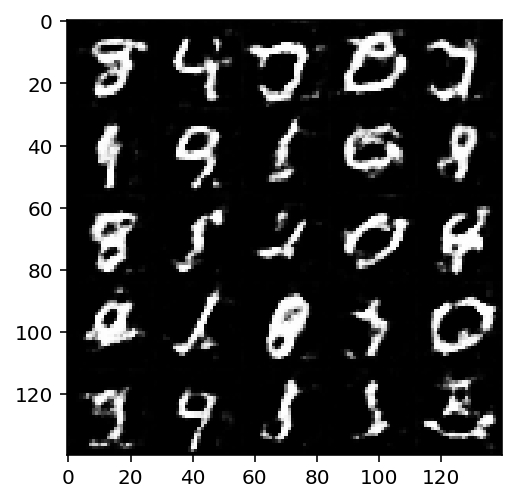

Epoch 1/2... Discriminator Loss: 0.7280... Generator Loss: 1.6334
Epoch 1/2... Discriminator Loss: 0.7210... Generator Loss: 1.7332
Epoch 1/2... Discriminator Loss: 0.9241... Generator Loss: 1.1240
Epoch 1/2... Discriminator Loss: 0.6890... Generator Loss: 2.2368
Epoch 1/2... Discriminator Loss: 0.7260... Generator Loss: 1.5870
Epoch 1/2... Discriminator Loss: 0.7140... Generator Loss: 1.7154
Epoch 1/2... Discriminator Loss: 0.5982... Generator Loss: 2.7497
Epoch 1/2... Discriminator Loss: 0.7289... Generator Loss: 1.7940
Epoch 1/2... Discriminator Loss: 1.7729... Generator Loss: 0.4824
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 0.9923


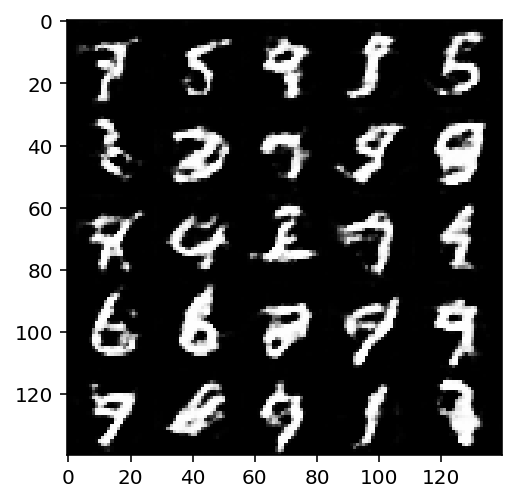

Epoch 1/2... Discriminator Loss: 0.6428... Generator Loss: 2.4495
Epoch 1/2... Discriminator Loss: 0.6571... Generator Loss: 2.0236
Epoch 1/2... Discriminator Loss: 0.6923... Generator Loss: 1.7210
Epoch 1/2... Discriminator Loss: 0.6725... Generator Loss: 1.9559
Epoch 1/2... Discriminator Loss: 0.9724... Generator Loss: 2.8618
Epoch 1/2... Discriminator Loss: 1.2446... Generator Loss: 0.7478
Epoch 1/2... Discriminator Loss: 0.7711... Generator Loss: 1.5346
Epoch 1/2... Discriminator Loss: 0.9498... Generator Loss: 1.1288
Epoch 1/2... Discriminator Loss: 0.8881... Generator Loss: 1.3187
Epoch 1/2... Discriminator Loss: 0.7551... Generator Loss: 1.5887


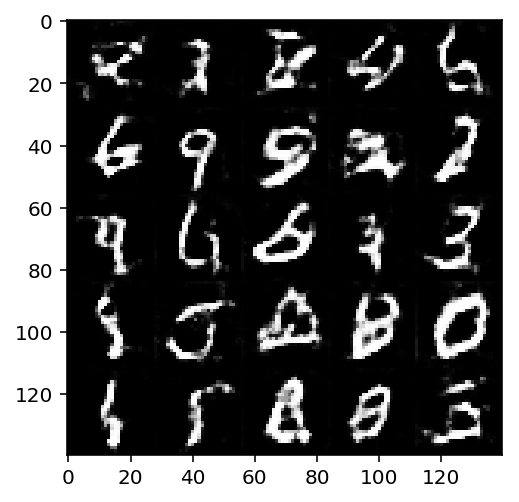

Epoch 1/2... Discriminator Loss: 1.0327... Generator Loss: 1.0749
Epoch 1/2... Discriminator Loss: 0.6766... Generator Loss: 1.9295
Epoch 1/2... Discriminator Loss: 1.2078... Generator Loss: 0.7872
Epoch 1/2... Discriminator Loss: 0.6884... Generator Loss: 1.9679
Epoch 1/2... Discriminator Loss: 0.6859... Generator Loss: 1.7876
Epoch 1/2... Discriminator Loss: 0.6856... Generator Loss: 2.3493
Epoch 1/2... Discriminator Loss: 0.7663... Generator Loss: 1.5048
Epoch 2/2... Discriminator Loss: 0.7471... Generator Loss: 2.1434
Epoch 2/2... Discriminator Loss: 1.0310... Generator Loss: 1.0172
Epoch 2/2... Discriminator Loss: 1.0496... Generator Loss: 1.0601


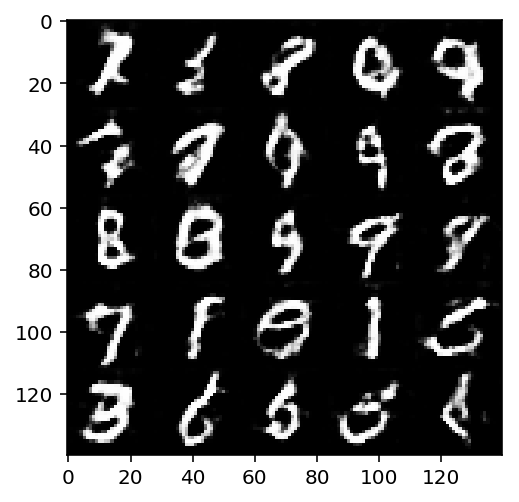

Epoch 2/2... Discriminator Loss: 0.7295... Generator Loss: 1.7149
Epoch 2/2... Discriminator Loss: 0.6817... Generator Loss: 1.9198
Epoch 2/2... Discriminator Loss: 0.8182... Generator Loss: 2.2036
Epoch 2/2... Discriminator Loss: 0.8858... Generator Loss: 1.1676
Epoch 2/2... Discriminator Loss: 0.6840... Generator Loss: 1.8801
Epoch 2/2... Discriminator Loss: 0.9625... Generator Loss: 1.1261
Epoch 2/2... Discriminator Loss: 0.8012... Generator Loss: 1.4468
Epoch 2/2... Discriminator Loss: 0.7683... Generator Loss: 1.4408
Epoch 2/2... Discriminator Loss: 0.6425... Generator Loss: 2.3157
Epoch 2/2... Discriminator Loss: 0.7509... Generator Loss: 1.5162


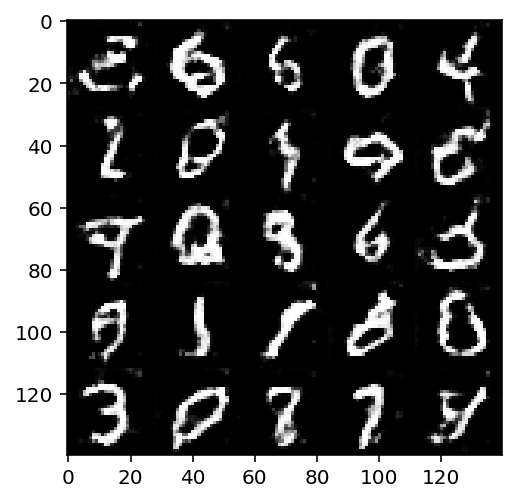

Epoch 2/2... Discriminator Loss: 0.7212... Generator Loss: 1.7650
Epoch 2/2... Discriminator Loss: 0.6996... Generator Loss: 1.9821
Epoch 2/2... Discriminator Loss: 0.6846... Generator Loss: 1.9885
Epoch 2/2... Discriminator Loss: 0.7560... Generator Loss: 1.6877
Epoch 2/2... Discriminator Loss: 0.6315... Generator Loss: 2.1408
Epoch 2/2... Discriminator Loss: 0.7327... Generator Loss: 1.6509
Epoch 2/2... Discriminator Loss: 1.2246... Generator Loss: 0.8606
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 1.7651
Epoch 2/2... Discriminator Loss: 0.7238... Generator Loss: 1.6176
Epoch 2/2... Discriminator Loss: 0.7057... Generator Loss: 2.6736


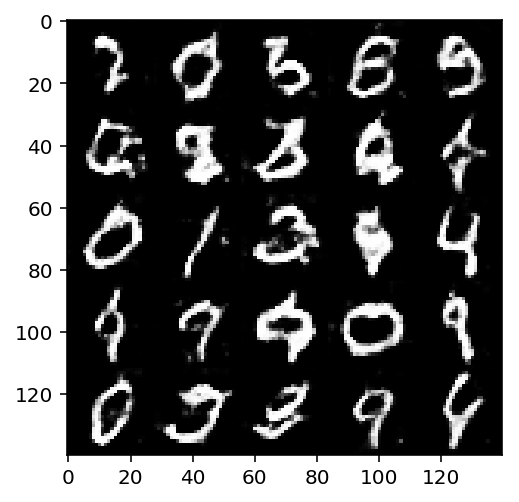

Epoch 2/2... Discriminator Loss: 0.6466... Generator Loss: 1.9331
Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 1.7087
Epoch 2/2... Discriminator Loss: 0.7182... Generator Loss: 1.6224
Epoch 2/2... Discriminator Loss: 0.7670... Generator Loss: 1.5168
Epoch 2/2... Discriminator Loss: 0.7788... Generator Loss: 1.5217
Epoch 2/2... Discriminator Loss: 0.8443... Generator Loss: 1.3741
Epoch 2/2... Discriminator Loss: 2.0011... Generator Loss: 4.1489
Epoch 2/2... Discriminator Loss: 0.7052... Generator Loss: 1.7592
Epoch 2/2... Discriminator Loss: 0.7313... Generator Loss: 1.6177
Epoch 2/2... Discriminator Loss: 0.7059... Generator Loss: 1.7210


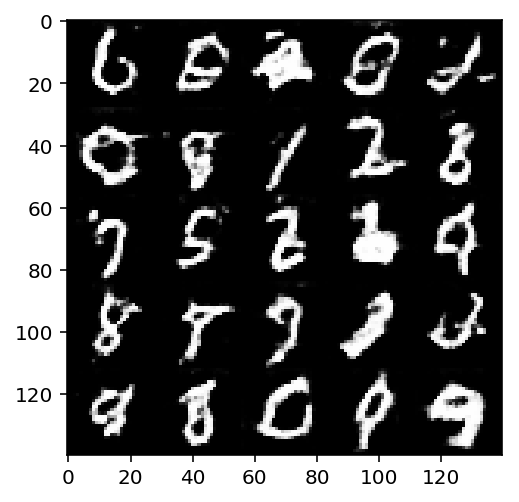

Epoch 2/2... Discriminator Loss: 0.7358... Generator Loss: 1.5714
Epoch 2/2... Discriminator Loss: 0.8683... Generator Loss: 2.5721
Epoch 2/2... Discriminator Loss: 0.7432... Generator Loss: 2.8998
Epoch 2/2... Discriminator Loss: 0.6713... Generator Loss: 1.9888
Epoch 2/2... Discriminator Loss: 0.7299... Generator Loss: 1.5789
Epoch 2/2... Discriminator Loss: 0.7825... Generator Loss: 1.4411
Epoch 2/2... Discriminator Loss: 0.8204... Generator Loss: 1.3423
Epoch 2/2... Discriminator Loss: 0.8167... Generator Loss: 1.2911
Epoch 2/2... Discriminator Loss: 0.9508... Generator Loss: 1.1567
Epoch 2/2... Discriminator Loss: 0.9043... Generator Loss: 1.1763


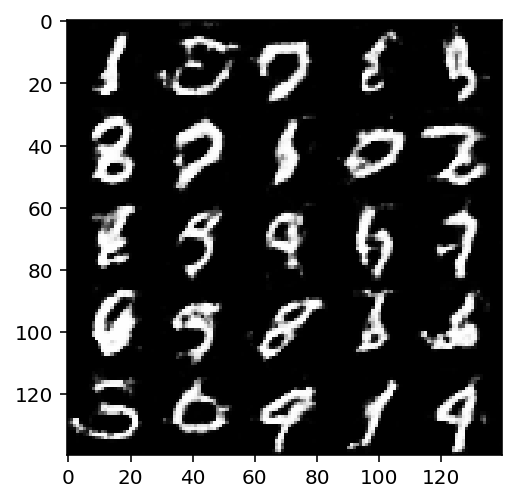

Epoch 2/2... Discriminator Loss: 0.7081... Generator Loss: 1.7850
Epoch 2/2... Discriminator Loss: 1.0396... Generator Loss: 0.9844
Epoch 2/2... Discriminator Loss: 0.8465... Generator Loss: 1.2619
Epoch 2/2... Discriminator Loss: 1.1202... Generator Loss: 0.9990
Epoch 2/2... Discriminator Loss: 0.7444... Generator Loss: 1.6182
Epoch 2/2... Discriminator Loss: 1.2404... Generator Loss: 0.7675
Epoch 2/2... Discriminator Loss: 0.6762... Generator Loss: 1.9295
Epoch 2/2... Discriminator Loss: 0.7119... Generator Loss: 1.7168
Epoch 2/2... Discriminator Loss: 0.7531... Generator Loss: 1.5409
Epoch 2/2... Discriminator Loss: 0.7728... Generator Loss: 1.5086


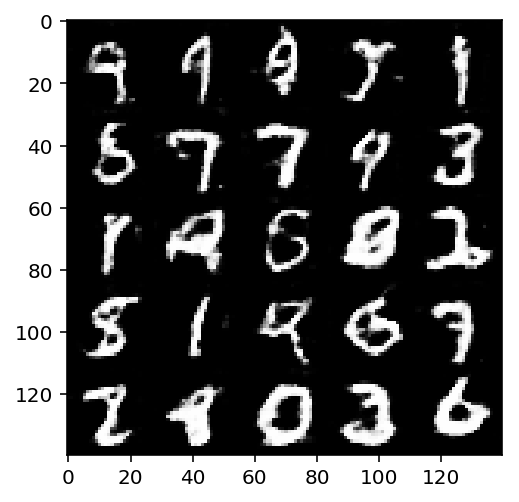

Epoch 2/2... Discriminator Loss: 0.7039... Generator Loss: 1.9553
Epoch 2/2... Discriminator Loss: 0.9532... Generator Loss: 1.2693
Epoch 2/2... Discriminator Loss: 0.8120... Generator Loss: 1.3917
Epoch 2/2... Discriminator Loss: 0.5837... Generator Loss: 2.3659
Epoch 2/2... Discriminator Loss: 0.8580... Generator Loss: 1.9351
Epoch 2/2... Discriminator Loss: 0.7588... Generator Loss: 1.5000
Epoch 2/2... Discriminator Loss: 0.8075... Generator Loss: 1.8095
Epoch 2/2... Discriminator Loss: 0.7232... Generator Loss: 1.7503
Epoch 2/2... Discriminator Loss: 1.0114... Generator Loss: 1.0104
Epoch 2/2... Discriminator Loss: 0.6176... Generator Loss: 2.1101


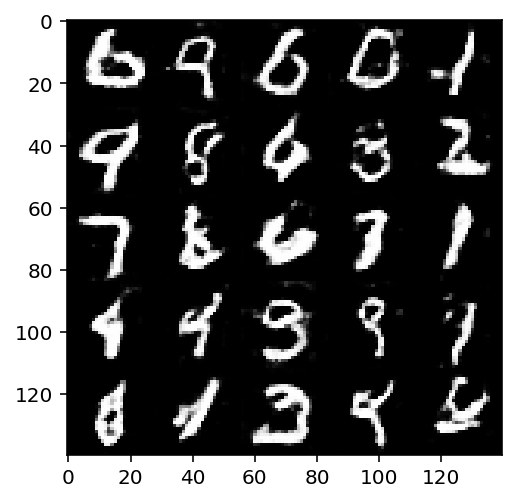

Epoch 2/2... Discriminator Loss: 0.6513... Generator Loss: 2.0638
Epoch 2/2... Discriminator Loss: 0.7837... Generator Loss: 1.3891
Epoch 2/2... Discriminator Loss: 0.8366... Generator Loss: 1.4128
Epoch 2/2... Discriminator Loss: 0.6402... Generator Loss: 2.0281
Epoch 2/2... Discriminator Loss: 0.8640... Generator Loss: 1.3579
Epoch 2/2... Discriminator Loss: 1.0025... Generator Loss: 1.0053
Epoch 2/2... Discriminator Loss: 0.7781... Generator Loss: 1.4481
Epoch 2/2... Discriminator Loss: 0.6792... Generator Loss: 1.8303
Epoch 2/2... Discriminator Loss: 0.6821... Generator Loss: 2.1987
Epoch 2/2... Discriminator Loss: 1.6056... Generator Loss: 0.5326


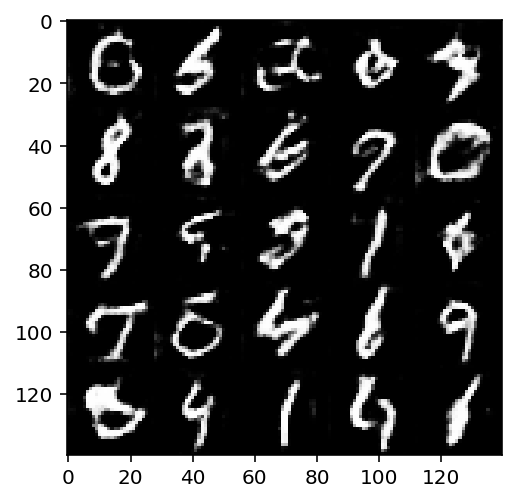

Epoch 2/2... Discriminator Loss: 0.7741... Generator Loss: 2.5820
Epoch 2/2... Discriminator Loss: 0.8273... Generator Loss: 1.3480
Epoch 2/2... Discriminator Loss: 0.9337... Generator Loss: 1.1317
Epoch 2/2... Discriminator Loss: 0.8043... Generator Loss: 1.3263
Epoch 2/2... Discriminator Loss: 0.7425... Generator Loss: 1.5379
Epoch 2/2... Discriminator Loss: 0.7302... Generator Loss: 1.5959
Epoch 2/2... Discriminator Loss: 0.7204... Generator Loss: 1.7223
Epoch 2/2... Discriminator Loss: 0.7179... Generator Loss: 1.7046
Epoch 2/2... Discriminator Loss: 0.6442... Generator Loss: 2.1618
Epoch 2/2... Discriminator Loss: 1.2652... Generator Loss: 0.8047


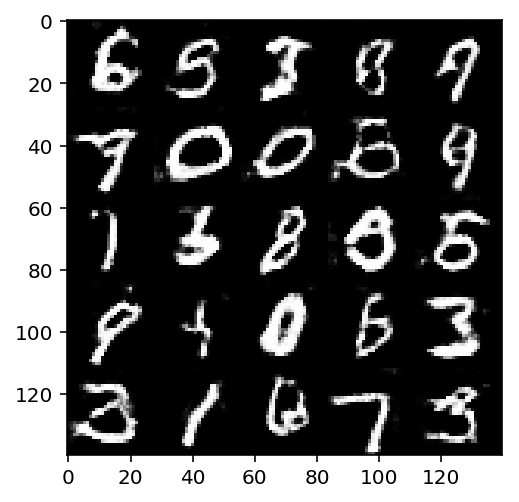

Epoch 2/2... Discriminator Loss: 0.6580... Generator Loss: 2.1424
Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 2.6864
Epoch 2/2... Discriminator Loss: 0.7323... Generator Loss: 1.5632
Epoch 2/2... Discriminator Loss: 0.9241... Generator Loss: 1.1754
Epoch 2/2... Discriminator Loss: 0.6587... Generator Loss: 1.8846
Epoch 2/2... Discriminator Loss: 0.6923... Generator Loss: 3.0718
Epoch 2/2... Discriminator Loss: 0.6824... Generator Loss: 1.8738
Epoch 2/2... Discriminator Loss: 0.6377... Generator Loss: 2.2446
Epoch 2/2... Discriminator Loss: 0.5950... Generator Loss: 2.3728
Epoch 2/2... Discriminator Loss: 0.7523... Generator Loss: 1.6071


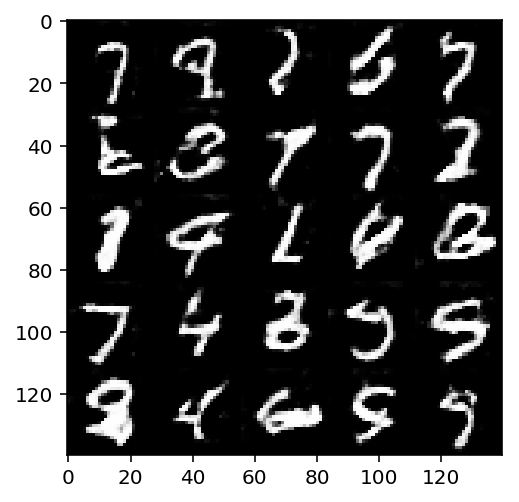

Epoch 2/2... Discriminator Loss: 0.6934... Generator Loss: 1.6909
Epoch 2/2... Discriminator Loss: 0.7778... Generator Loss: 1.4705
Epoch 2/2... Discriminator Loss: 0.6802... Generator Loss: 2.2428
Epoch 2/2... Discriminator Loss: 0.8986... Generator Loss: 1.4385
Epoch 2/2... Discriminator Loss: 0.6473... Generator Loss: 1.9564
Epoch 2/2... Discriminator Loss: 0.6152... Generator Loss: 2.2853
Epoch 2/2... Discriminator Loss: 0.5684... Generator Loss: 2.9240
Epoch 2/2... Discriminator Loss: 0.7062... Generator Loss: 1.6897
Epoch 2/2... Discriminator Loss: 0.7845... Generator Loss: 1.4895
Epoch 2/2... Discriminator Loss: 0.7511... Generator Loss: 1.5386


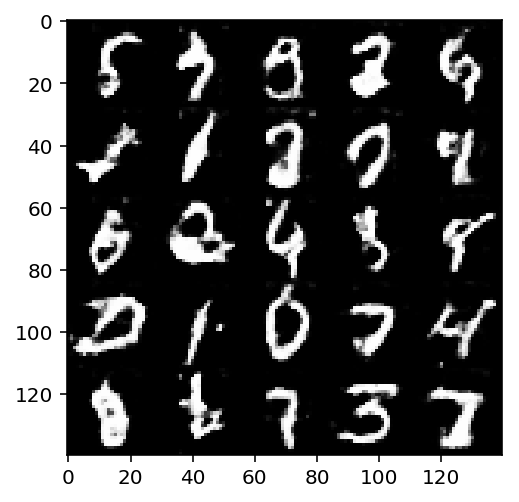

Epoch 2/2... Discriminator Loss: 0.6789... Generator Loss: 1.7573
Epoch 2/2... Discriminator Loss: 0.6408... Generator Loss: 2.1412
Epoch 2/2... Discriminator Loss: 0.7393... Generator Loss: 2.1158
Epoch 2/2... Discriminator Loss: 0.6952... Generator Loss: 2.5663
Epoch 2/2... Discriminator Loss: 0.6200... Generator Loss: 2.2438
Epoch 2/2... Discriminator Loss: 0.7968... Generator Loss: 1.5500
Epoch 2/2... Discriminator Loss: 0.8972... Generator Loss: 1.2544
Epoch 2/2... Discriminator Loss: 0.6526... Generator Loss: 1.9941
Epoch 2/2... Discriminator Loss: 1.0187... Generator Loss: 2.4399
Epoch 2/2... Discriminator Loss: 0.6784... Generator Loss: 1.8512


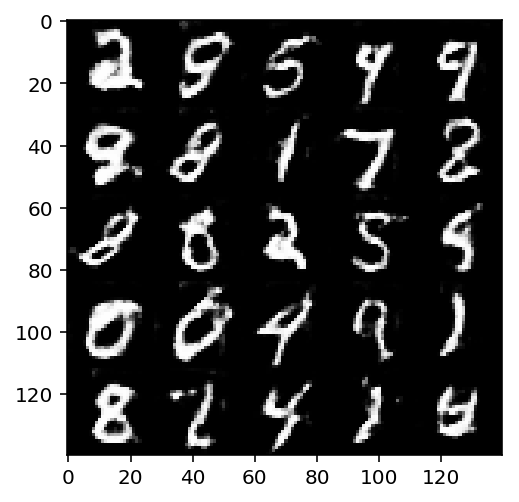

Epoch 2/2... Discriminator Loss: 0.6081... Generator Loss: 2.3301
Epoch 2/2... Discriminator Loss: 0.6688... Generator Loss: 1.9776
Epoch 2/2... Discriminator Loss: 0.6420... Generator Loss: 1.9827
Epoch 2/2... Discriminator Loss: 0.6999... Generator Loss: 1.9172
Epoch 2/2... Discriminator Loss: 0.9887... Generator Loss: 1.0699
Epoch 2/2... Discriminator Loss: 0.6143... Generator Loss: 2.1993
Epoch 2/2... Discriminator Loss: 0.6761... Generator Loss: 1.7942
Epoch 2/2... Discriminator Loss: 0.6315... Generator Loss: 2.2400
Epoch 2/2... Discriminator Loss: 0.6132... Generator Loss: 2.4246
Epoch 2/2... Discriminator Loss: 0.7310... Generator Loss: 1.8868


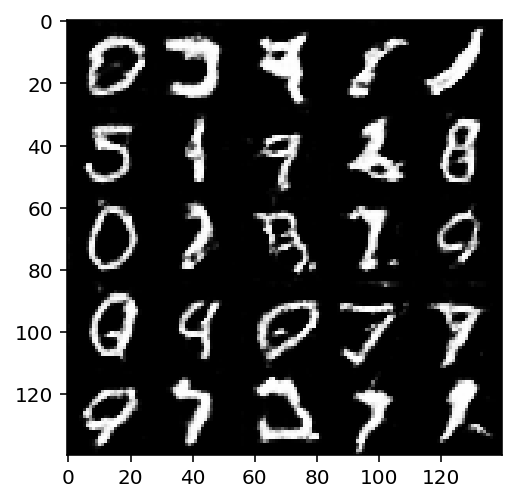

Epoch 2/2... Discriminator Loss: 0.6580... Generator Loss: 1.9913
Epoch 2/2... Discriminator Loss: 0.7471... Generator Loss: 1.5387
Epoch 2/2... Discriminator Loss: 0.6775... Generator Loss: 1.8837
Epoch 2/2... Discriminator Loss: 0.7906... Generator Loss: 1.5764
Epoch 2/2... Discriminator Loss: 1.5257... Generator Loss: 0.6445
Epoch 2/2... Discriminator Loss: 0.7694... Generator Loss: 2.3141
Epoch 2/2... Discriminator Loss: 0.6505... Generator Loss: 2.0387
Epoch 2/2... Discriminator Loss: 0.6730... Generator Loss: 1.8899
Epoch 2/2... Discriminator Loss: 0.6605... Generator Loss: 1.8879
Epoch 2/2... Discriminator Loss: 0.7335... Generator Loss: 1.8816


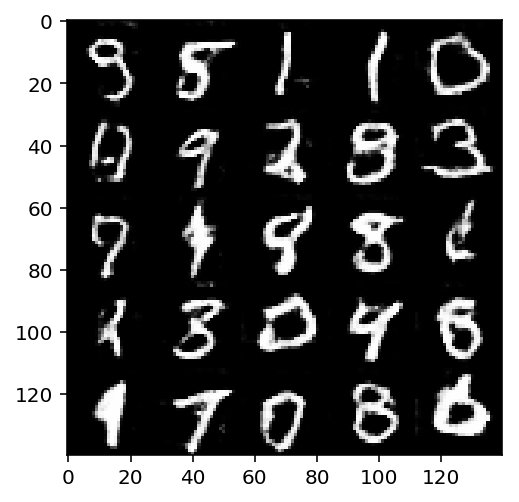

Epoch 2/2... Discriminator Loss: 0.6055... Generator Loss: 2.4957
Epoch 2/2... Discriminator Loss: 0.6388... Generator Loss: 2.1265
Epoch 2/2... Discriminator Loss: 0.7636... Generator Loss: 1.5087
Epoch 2/2... Discriminator Loss: 1.2116... Generator Loss: 0.8379
Epoch 2/2... Discriminator Loss: 0.7203... Generator Loss: 1.6493
Epoch 2/2... Discriminator Loss: 0.6998... Generator Loss: 1.9430
Epoch 2/2... Discriminator Loss: 0.6586... Generator Loss: 1.9481
Epoch 2/2... Discriminator Loss: 0.6194... Generator Loss: 2.1523
Epoch 2/2... Discriminator Loss: 0.5947... Generator Loss: 2.1738
Epoch 2/2... Discriminator Loss: 0.7074... Generator Loss: 1.6967


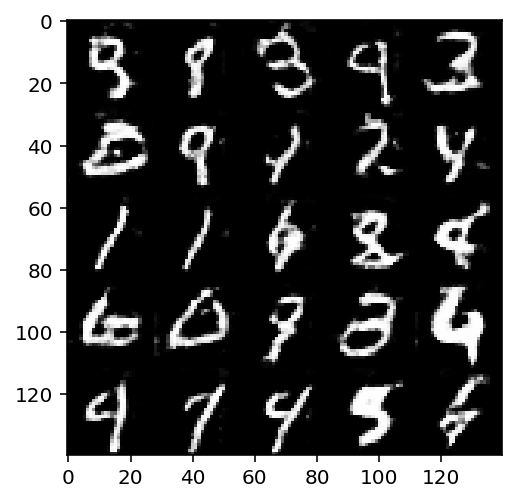

Epoch 2/2... Discriminator Loss: 0.7605... Generator Loss: 1.6238
Epoch 2/2... Discriminator Loss: 0.6462... Generator Loss: 1.9623
Epoch 2/2... Discriminator Loss: 0.7740... Generator Loss: 1.5277
Epoch 2/2... Discriminator Loss: 0.6165... Generator Loss: 2.5617
Epoch 2/2... Discriminator Loss: 0.7523... Generator Loss: 1.5947
Epoch 2/2... Discriminator Loss: 0.6209... Generator Loss: 2.2236
Epoch 2/2... Discriminator Loss: 0.6564... Generator Loss: 2.0764
Epoch 2/2... Discriminator Loss: 2.9105... Generator Loss: 0.1971
Epoch 2/2... Discriminator Loss: 0.8472... Generator Loss: 1.3174
Epoch 2/2... Discriminator Loss: 0.7757... Generator Loss: 2.5281


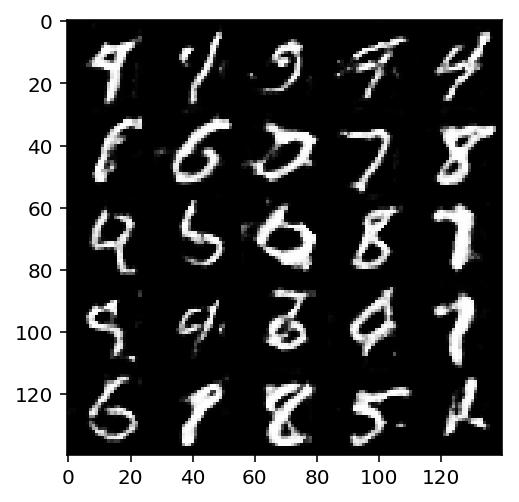

Epoch 2/2... Discriminator Loss: 1.1200... Generator Loss: 0.9027
Epoch 2/2... Discriminator Loss: 0.6489... Generator Loss: 2.0445
Epoch 2/2... Discriminator Loss: 1.1376... Generator Loss: 0.8773
Epoch 2/2... Discriminator Loss: 0.7120... Generator Loss: 1.7953
Epoch 2/2... Discriminator Loss: 0.6394... Generator Loss: 2.0996
Epoch 2/2... Discriminator Loss: 1.1134... Generator Loss: 0.9813
Epoch 2/2... Discriminator Loss: 0.8440... Generator Loss: 1.4553
Epoch 2/2... Discriminator Loss: 0.7502... Generator Loss: 1.5307
Epoch 2/2... Discriminator Loss: 0.7309... Generator Loss: 1.6710
Epoch 2/2... Discriminator Loss: 0.6266... Generator Loss: 2.0889


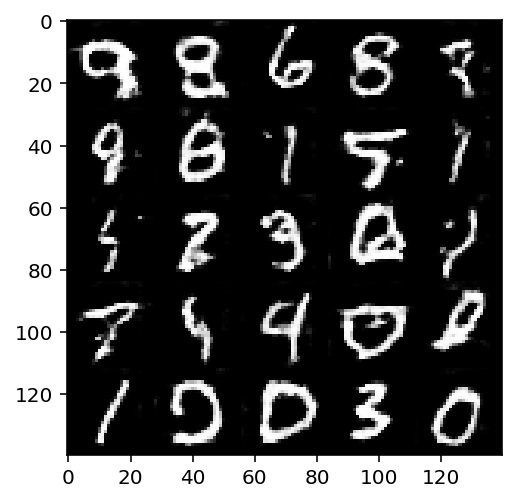

Epoch 2/2... Discriminator Loss: 0.7849... Generator Loss: 1.4439
Epoch 2/2... Discriminator Loss: 0.5564... Generator Loss: 2.7202
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 1.4272
Epoch 2/2... Discriminator Loss: 0.7379... Generator Loss: 1.6724
Epoch 2/2... Discriminator Loss: 0.7377... Generator Loss: 1.6646
Epoch 2/2... Discriminator Loss: 0.7079... Generator Loss: 1.6978
Epoch 2/2... Discriminator Loss: 0.6091... Generator Loss: 2.1605
Epoch 2/2... Discriminator Loss: 0.7392... Generator Loss: 1.6951
Epoch 2/2... Discriminator Loss: 1.1117... Generator Loss: 0.9111
Epoch 2/2... Discriminator Loss: 0.6467... Generator Loss: 2.0412


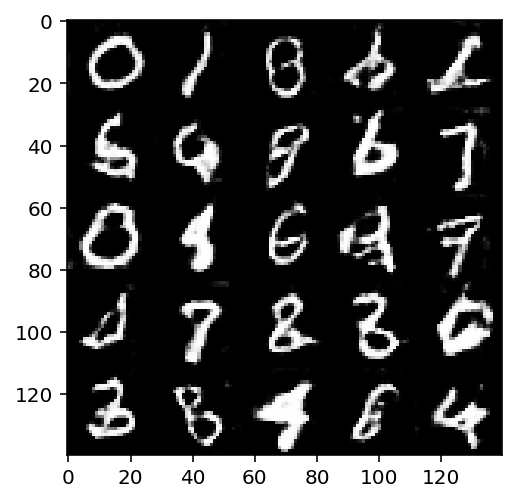

Epoch 2/2... Discriminator Loss: 0.7005... Generator Loss: 2.6076
Epoch 2/2... Discriminator Loss: 0.6654... Generator Loss: 2.0550
Epoch 2/2... Discriminator Loss: 0.6974... Generator Loss: 2.1357
Epoch 2/2... Discriminator Loss: 0.6685... Generator Loss: 1.8690
Epoch 2/2... Discriminator Loss: 0.6333... Generator Loss: 2.2750
Epoch 2/2... Discriminator Loss: 0.9422... Generator Loss: 1.3082
Epoch 2/2... Discriminator Loss: 0.6714... Generator Loss: 2.3828
Epoch 2/2... Discriminator Loss: 0.6287... Generator Loss: 2.4069
Epoch 2/2... Discriminator Loss: 0.7425... Generator Loss: 1.6497
Epoch 2/2... Discriminator Loss: 0.6239... Generator Loss: 2.2098


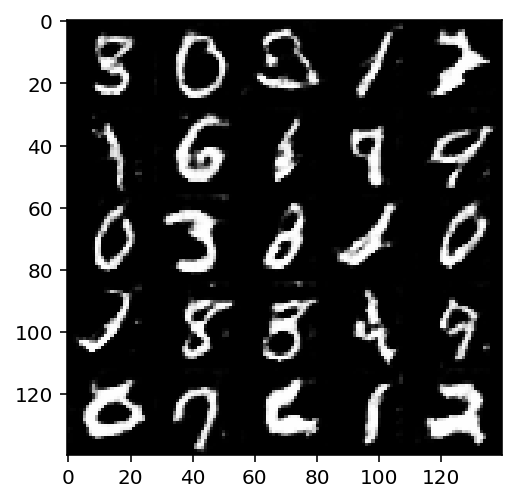

Epoch 2/2... Discriminator Loss: 0.7920... Generator Loss: 1.4467
Epoch 2/2... Discriminator Loss: 0.8394... Generator Loss: 1.4891
Epoch 2/2... Discriminator Loss: 0.7274... Generator Loss: 1.7417
Epoch 2/2... Discriminator Loss: 0.7557... Generator Loss: 1.5538
Epoch 2/2... Discriminator Loss: 0.5605... Generator Loss: 2.8581


In [118]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4
rate = 0.2
#alpha = 0.1

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    losses = train(epochs, batch_size, z_dim, learning_rate, rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

In [119]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

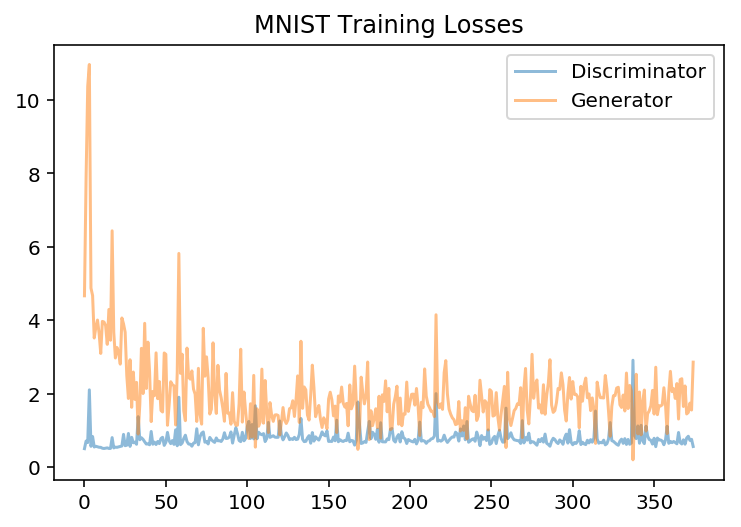

In [120]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("MNIST Training Losses")
plt.legend()

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.3543... Generator Loss: 1.7593
Epoch 1/1... Discriminator Loss: 0.1297... Generator Loss: 5.1677
Epoch 1/1... Discriminator Loss: 0.1192... Generator Loss: 5.5222
Epoch 1/1... Discriminator Loss: 0.6998... Generator Loss: 0.9650
Epoch 1/1... Discriminator Loss: 0.1285... Generator Loss: 15.8805
Epoch 1/1... Discriminator Loss: 0.6532... Generator Loss: 0.9873
Epoch 1/1... Discriminator Loss: 0.2372... Generator Loss: 2.4264
Epoch 1/1... Discriminator Loss: 0.1468... Generator Loss: 4.0664
Epoch 1/1... Discriminator Loss: 0.1460... Generator Loss: 3.7021
Epoch 1/1... Discriminator Loss: 0.2024... Generator Loss: 4.5307


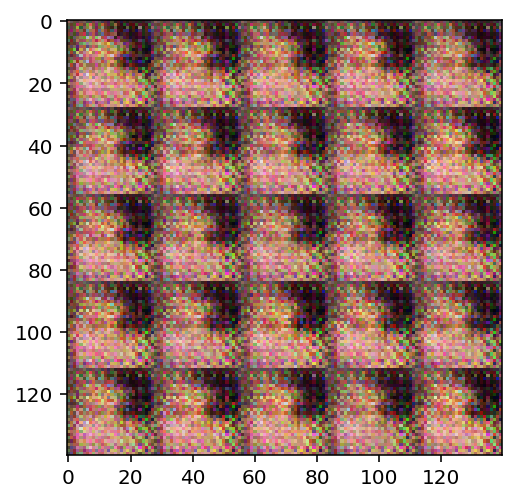

Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 4.4985
Epoch 1/1... Discriminator Loss: 0.2951... Generator Loss: 1.9753
Epoch 1/1... Discriminator Loss: 0.2226... Generator Loss: 2.5752
Epoch 1/1... Discriminator Loss: 0.1939... Generator Loss: 2.8293
Epoch 1/1... Discriminator Loss: 0.1387... Generator Loss: 4.8001
Epoch 1/1... Discriminator Loss: 0.2128... Generator Loss: 9.7090
Epoch 1/1... Discriminator Loss: 0.1385... Generator Loss: 4.2487
Epoch 1/1... Discriminator Loss: 0.1449... Generator Loss: 3.7612
Epoch 1/1... Discriminator Loss: 0.3104... Generator Loss: 1.8847
Epoch 1/1... Discriminator Loss: 0.1643... Generator Loss: 3.7283


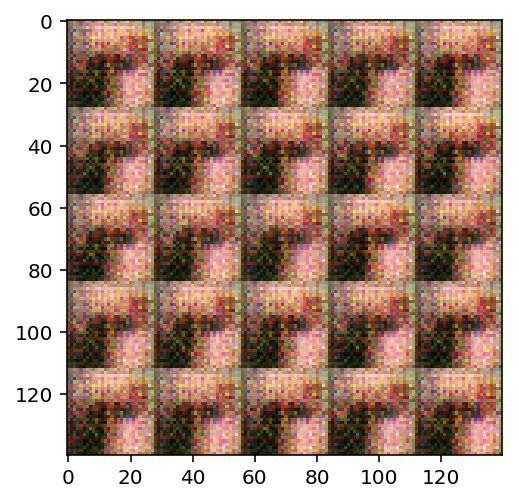

Epoch 1/1... Discriminator Loss: 0.1535... Generator Loss: 3.5472
Epoch 1/1... Discriminator Loss: 0.1440... Generator Loss: 3.6634
Epoch 1/1... Discriminator Loss: 0.2875... Generator Loss: 1.9020
Epoch 1/1... Discriminator Loss: 0.1473... Generator Loss: 3.4955
Epoch 1/1... Discriminator Loss: 0.1680... Generator Loss: 3.3153
Epoch 1/1... Discriminator Loss: 0.1399... Generator Loss: 4.3346
Epoch 1/1... Discriminator Loss: 0.1526... Generator Loss: 6.1713
Epoch 1/1... Discriminator Loss: 0.1771... Generator Loss: 2.8837
Epoch 1/1... Discriminator Loss: 0.1535... Generator Loss: 3.6763
Epoch 1/1... Discriminator Loss: 0.2043... Generator Loss: 3.7030


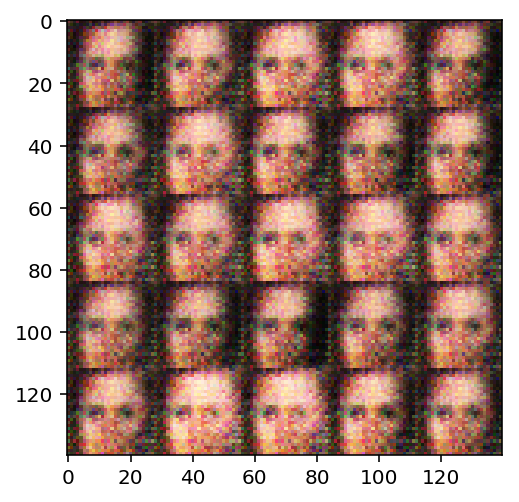

Epoch 1/1... Discriminator Loss: 0.5842... Generator Loss: 1.1892
Epoch 1/1... Discriminator Loss: 0.9449... Generator Loss: 8.4767
Epoch 1/1... Discriminator Loss: 0.2496... Generator Loss: 3.2284
Epoch 1/1... Discriminator Loss: 0.2574... Generator Loss: 4.9201
Epoch 1/1... Discriminator Loss: 0.2505... Generator Loss: 2.4659
Epoch 1/1... Discriminator Loss: 0.1583... Generator Loss: 4.0156
Epoch 1/1... Discriminator Loss: 0.1329... Generator Loss: 6.6495
Epoch 1/1... Discriminator Loss: 0.2622... Generator Loss: 2.8382
Epoch 1/1... Discriminator Loss: 0.1929... Generator Loss: 3.6789
Epoch 1/1... Discriminator Loss: 0.2233... Generator Loss: 2.7835


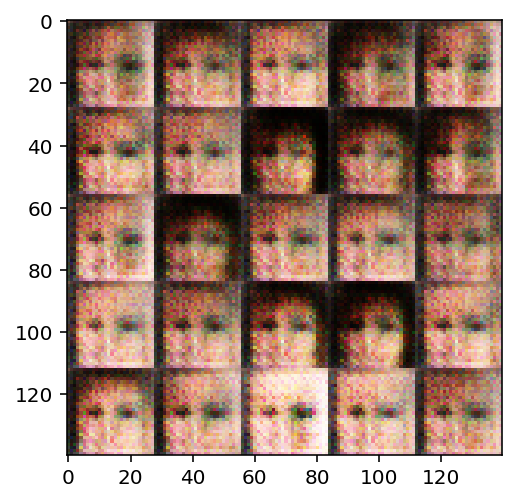

Epoch 1/1... Discriminator Loss: 0.2233... Generator Loss: 2.7517
Epoch 1/1... Discriminator Loss: 0.3431... Generator Loss: 2.0341
Epoch 1/1... Discriminator Loss: 0.2294... Generator Loss: 4.4865
Epoch 1/1... Discriminator Loss: 0.2748... Generator Loss: 4.4297
Epoch 1/1... Discriminator Loss: 1.6307... Generator Loss: 0.3548
Epoch 1/1... Discriminator Loss: 0.6178... Generator Loss: 5.1014
Epoch 1/1... Discriminator Loss: 0.4110... Generator Loss: 1.5500
Epoch 1/1... Discriminator Loss: 0.2435... Generator Loss: 2.7542
Epoch 1/1... Discriminator Loss: 0.2848... Generator Loss: 2.3483
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 0.7269


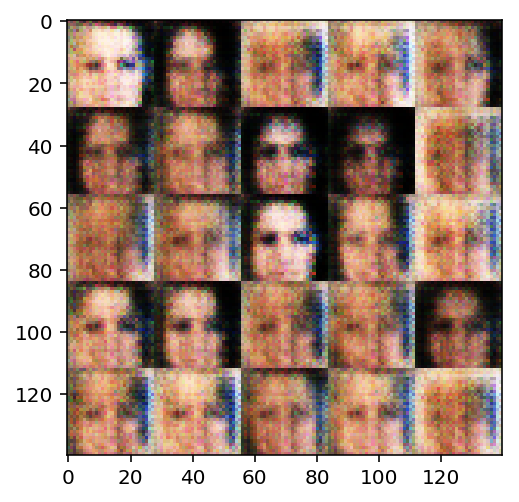

Epoch 1/1... Discriminator Loss: 0.4931... Generator Loss: 2.4688
Epoch 1/1... Discriminator Loss: 0.4765... Generator Loss: 4.4393
Epoch 1/1... Discriminator Loss: 0.1492... Generator Loss: 3.7082
Epoch 1/1... Discriminator Loss: 0.3736... Generator Loss: 1.9965
Epoch 1/1... Discriminator Loss: 0.2903... Generator Loss: 3.5619
Epoch 1/1... Discriminator Loss: 0.2283... Generator Loss: 2.8651
Epoch 1/1... Discriminator Loss: 0.3207... Generator Loss: 1.9645
Epoch 1/1... Discriminator Loss: 0.2848... Generator Loss: 2.2428
Epoch 1/1... Discriminator Loss: 0.6241... Generator Loss: 1.1672
Epoch 1/1... Discriminator Loss: 0.3049... Generator Loss: 2.0078


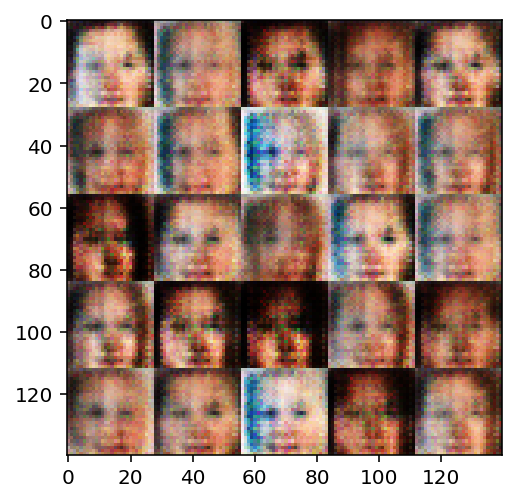

Epoch 1/1... Discriminator Loss: 0.1891... Generator Loss: 3.7909
Epoch 1/1... Discriminator Loss: 0.2160... Generator Loss: 2.9135
Epoch 1/1... Discriminator Loss: 0.2260... Generator Loss: 2.9930
Epoch 1/1... Discriminator Loss: 0.2882... Generator Loss: 2.4232
Epoch 1/1... Discriminator Loss: 0.4424... Generator Loss: 1.9643
Epoch 1/1... Discriminator Loss: 0.1774... Generator Loss: 5.7615
Epoch 1/1... Discriminator Loss: 0.4279... Generator Loss: 1.6684
Epoch 1/1... Discriminator Loss: 0.3245... Generator Loss: 2.2090
Epoch 1/1... Discriminator Loss: 0.3458... Generator Loss: 2.3690
Epoch 1/1... Discriminator Loss: 0.2006... Generator Loss: 3.1589


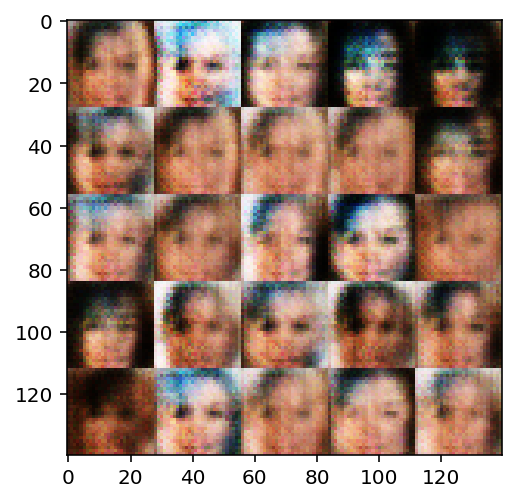

Epoch 1/1... Discriminator Loss: 0.2611... Generator Loss: 3.4875
Epoch 1/1... Discriminator Loss: 0.5663... Generator Loss: 1.2325
Epoch 1/1... Discriminator Loss: 0.4480... Generator Loss: 1.4559
Epoch 1/1... Discriminator Loss: 1.2273... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 0.2943... Generator Loss: 2.6668
Epoch 1/1... Discriminator Loss: 0.4437... Generator Loss: 1.7777
Epoch 1/1... Discriminator Loss: 0.7726... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 0.4176... Generator Loss: 1.6107
Epoch 1/1... Discriminator Loss: 0.2131... Generator Loss: 3.1411
Epoch 1/1... Discriminator Loss: 0.4675... Generator Loss: 2.1593


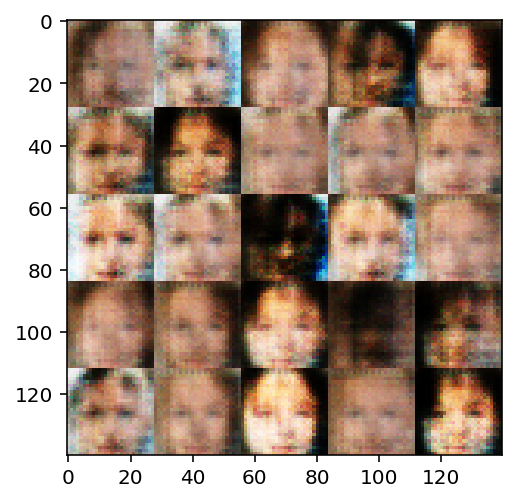

Epoch 1/1... Discriminator Loss: 0.2978... Generator Loss: 3.8746
Epoch 1/1... Discriminator Loss: 0.2183... Generator Loss: 2.7481
Epoch 1/1... Discriminator Loss: 0.4392... Generator Loss: 5.5939
Epoch 1/1... Discriminator Loss: 0.2722... Generator Loss: 2.2791
Epoch 1/1... Discriminator Loss: 0.3103... Generator Loss: 3.9125
Epoch 1/1... Discriminator Loss: 0.5251... Generator Loss: 4.1799
Epoch 1/1... Discriminator Loss: 0.3085... Generator Loss: 2.0303
Epoch 1/1... Discriminator Loss: 0.2986... Generator Loss: 2.5217
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.0676
Epoch 1/1... Discriminator Loss: 0.4571... Generator Loss: 1.5016


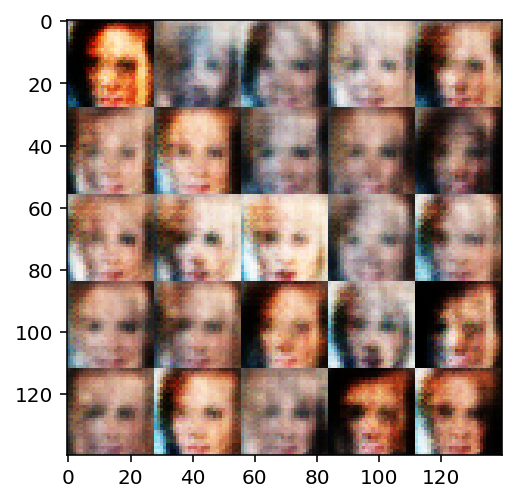

Epoch 1/1... Discriminator Loss: 0.6027... Generator Loss: 1.5053
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 2.8505
Epoch 1/1... Discriminator Loss: 0.4289... Generator Loss: 1.8699
Epoch 1/1... Discriminator Loss: 1.5351... Generator Loss: 0.3628
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 2.2507
Epoch 1/1... Discriminator Loss: 0.3242... Generator Loss: 2.2950
Epoch 1/1... Discriminator Loss: 0.3007... Generator Loss: 2.4121
Epoch 1/1... Discriminator Loss: 0.2284... Generator Loss: 2.7369
Epoch 1/1... Discriminator Loss: 0.3299... Generator Loss: 2.1832
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.5043


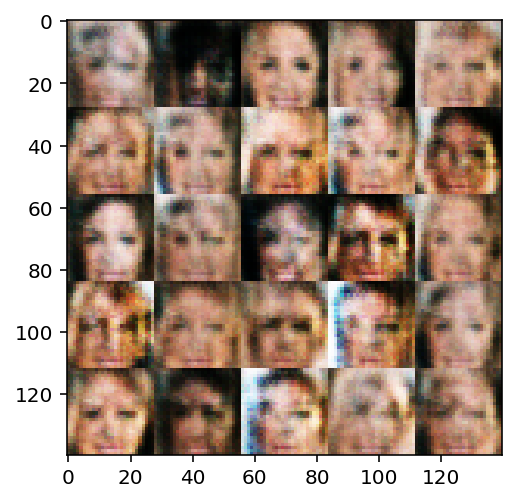

Epoch 1/1... Discriminator Loss: 0.2392... Generator Loss: 2.8662
Epoch 1/1... Discriminator Loss: 0.2648... Generator Loss: 2.6141
Epoch 1/1... Discriminator Loss: 0.6254... Generator Loss: 1.2746
Epoch 1/1... Discriminator Loss: 0.4000... Generator Loss: 4.7003
Epoch 1/1... Discriminator Loss: 1.0348... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 0.5086... Generator Loss: 1.5047
Epoch 1/1... Discriminator Loss: 0.5254... Generator Loss: 1.4853
Epoch 1/1... Discriminator Loss: 0.5443... Generator Loss: 1.3145
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 2.2900
Epoch 1/1... Discriminator Loss: 0.5162... Generator Loss: 1.5007


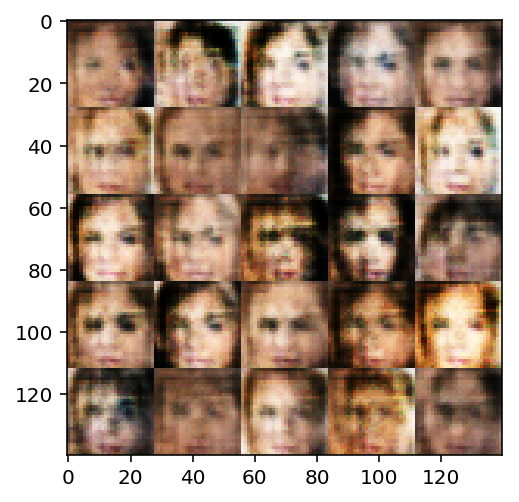

Epoch 1/1... Discriminator Loss: 0.4048... Generator Loss: 2.0418
Epoch 1/1... Discriminator Loss: 0.4193... Generator Loss: 2.1599
Epoch 1/1... Discriminator Loss: 0.3538... Generator Loss: 1.9743
Epoch 1/1... Discriminator Loss: 1.4033... Generator Loss: 0.5789
Epoch 1/1... Discriminator Loss: 0.5097... Generator Loss: 2.1346
Epoch 1/1... Discriminator Loss: 0.9048... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 0.8043... Generator Loss: 0.8676
Epoch 1/1... Discriminator Loss: 0.5318... Generator Loss: 1.4357
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 7.0309
Epoch 1/1... Discriminator Loss: 0.5536... Generator Loss: 1.3926


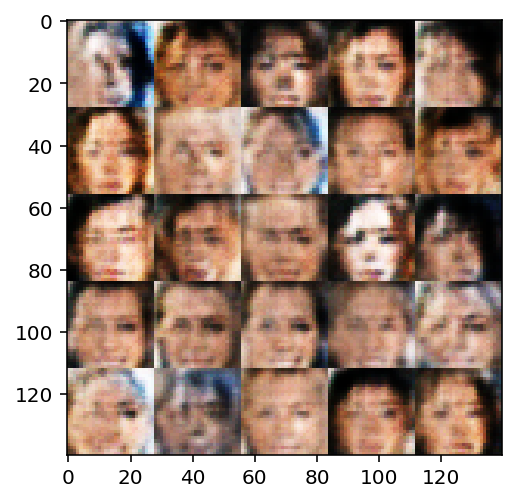

Epoch 1/1... Discriminator Loss: 0.4938... Generator Loss: 1.6018
Epoch 1/1... Discriminator Loss: 0.4069... Generator Loss: 3.7647
Epoch 1/1... Discriminator Loss: 0.3706... Generator Loss: 2.2073
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 4.9506
Epoch 1/1... Discriminator Loss: 0.5173... Generator Loss: 1.6439
Epoch 1/1... Discriminator Loss: 0.5357... Generator Loss: 1.5615
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 0.7469
Epoch 1/1... Discriminator Loss: 0.8500... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 0.4452... Generator Loss: 1.6356
Epoch 1/1... Discriminator Loss: 0.4417... Generator Loss: 3.0998


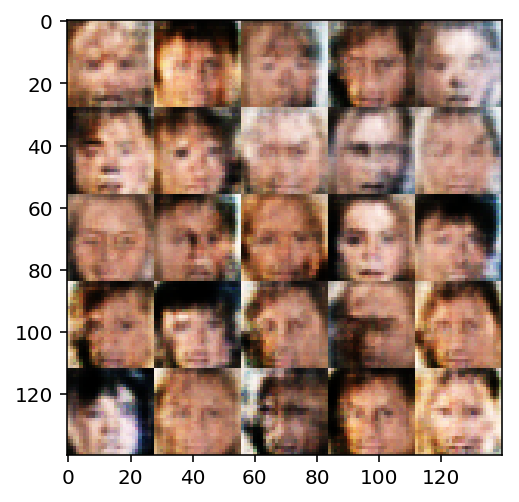

Epoch 1/1... Discriminator Loss: 0.4546... Generator Loss: 2.2649
Epoch 1/1... Discriminator Loss: 0.5204... Generator Loss: 3.2209
Epoch 1/1... Discriminator Loss: 0.5324... Generator Loss: 1.5308
Epoch 1/1... Discriminator Loss: 0.6535... Generator Loss: 1.4863
Epoch 1/1... Discriminator Loss: 0.4477... Generator Loss: 3.8333
Epoch 1/1... Discriminator Loss: 0.4934... Generator Loss: 1.3714
Epoch 1/1... Discriminator Loss: 0.6366... Generator Loss: 3.4986
Epoch 1/1... Discriminator Loss: 0.7336... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 0.4930... Generator Loss: 3.2181
Epoch 1/1... Discriminator Loss: 0.7790... Generator Loss: 0.9685


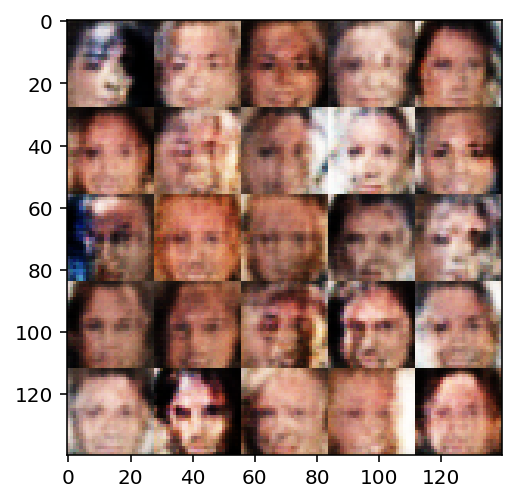

Epoch 1/1... Discriminator Loss: 0.5199... Generator Loss: 1.3744
Epoch 1/1... Discriminator Loss: 0.3169... Generator Loss: 3.2863
Epoch 1/1... Discriminator Loss: 0.7946... Generator Loss: 1.1307
Epoch 1/1... Discriminator Loss: 0.6705... Generator Loss: 1.0980
Epoch 1/1... Discriminator Loss: 0.3812... Generator Loss: 1.9344
Epoch 1/1... Discriminator Loss: 0.6313... Generator Loss: 4.2331
Epoch 1/1... Discriminator Loss: 0.8767... Generator Loss: 0.8860
Epoch 1/1... Discriminator Loss: 0.4755... Generator Loss: 3.0979
Epoch 1/1... Discriminator Loss: 0.4325... Generator Loss: 3.0195
Epoch 1/1... Discriminator Loss: 0.7762... Generator Loss: 3.8590


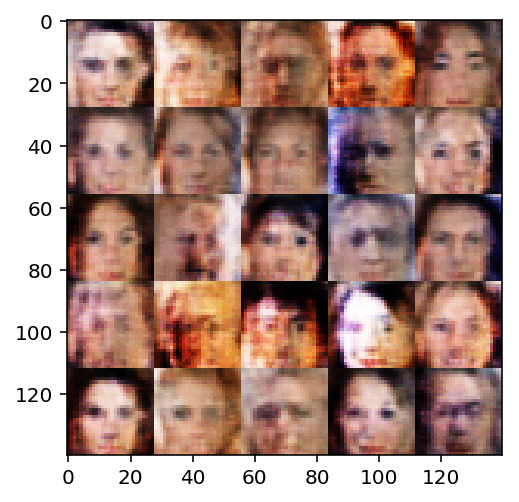

Epoch 1/1... Discriminator Loss: 0.8103... Generator Loss: 0.9739
Epoch 1/1... Discriminator Loss: 0.6332... Generator Loss: 1.0714
Epoch 1/1... Discriminator Loss: 0.9598... Generator Loss: 0.6712
Epoch 1/1... Discriminator Loss: 0.2747... Generator Loss: 2.9240
Epoch 1/1... Discriminator Loss: 0.3294... Generator Loss: 2.3116
Epoch 1/1... Discriminator Loss: 0.4242... Generator Loss: 1.8083
Epoch 1/1... Discriminator Loss: 0.3821... Generator Loss: 2.4155
Epoch 1/1... Discriminator Loss: 0.5216... Generator Loss: 1.4940
Epoch 1/1... Discriminator Loss: 0.4175... Generator Loss: 1.9183
Epoch 1/1... Discriminator Loss: 0.5788... Generator Loss: 1.2839


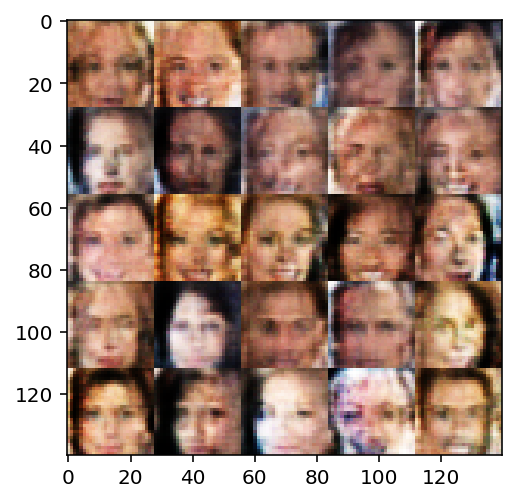

Epoch 1/1... Discriminator Loss: 0.8092... Generator Loss: 4.0890
Epoch 1/1... Discriminator Loss: 0.7357... Generator Loss: 3.4886
Epoch 1/1... Discriminator Loss: 0.6557... Generator Loss: 1.2130
Epoch 1/1... Discriminator Loss: 0.7035... Generator Loss: 1.2166
Epoch 1/1... Discriminator Loss: 0.5523... Generator Loss: 1.3043
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 6.5520
Epoch 1/1... Discriminator Loss: 0.2833... Generator Loss: 2.6260
Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 1.2438
Epoch 1/1... Discriminator Loss: 0.3880... Generator Loss: 3.4552
Epoch 1/1... Discriminator Loss: 0.4056... Generator Loss: 1.9982


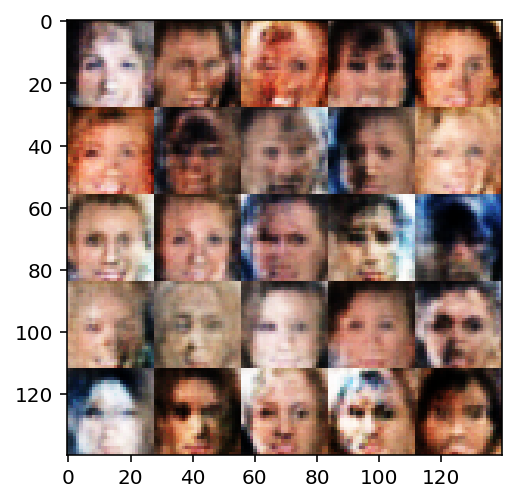

Epoch 1/1... Discriminator Loss: 0.6906... Generator Loss: 1.0747
Epoch 1/1... Discriminator Loss: 0.7890... Generator Loss: 1.2272
Epoch 1/1... Discriminator Loss: 0.5575... Generator Loss: 1.2771
Epoch 1/1... Discriminator Loss: 0.3104... Generator Loss: 2.1487
Epoch 1/1... Discriminator Loss: 0.3655... Generator Loss: 2.3398
Epoch 1/1... Discriminator Loss: 1.0317... Generator Loss: 0.6854
Epoch 1/1... Discriminator Loss: 0.5957... Generator Loss: 1.4349
Epoch 1/1... Discriminator Loss: 0.6147... Generator Loss: 1.2818
Epoch 1/1... Discriminator Loss: 0.6652... Generator Loss: 1.0776
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.6798


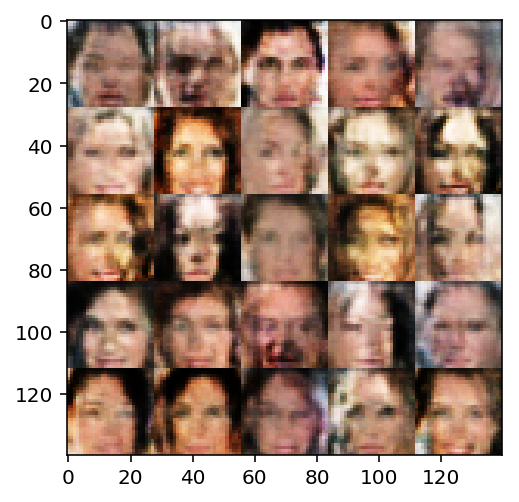

Epoch 1/1... Discriminator Loss: 1.3168... Generator Loss: 0.4513
Epoch 1/1... Discriminator Loss: 0.4249... Generator Loss: 2.1246
Epoch 1/1... Discriminator Loss: 0.8389... Generator Loss: 0.9137
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 1.8044
Epoch 1/1... Discriminator Loss: 0.5417... Generator Loss: 3.2885
Epoch 1/1... Discriminator Loss: 0.4893... Generator Loss: 1.5531
Epoch 1/1... Discriminator Loss: 0.4671... Generator Loss: 1.6030
Epoch 1/1... Discriminator Loss: 0.3438... Generator Loss: 2.3026
Epoch 1/1... Discriminator Loss: 0.4575... Generator Loss: 3.3884
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 5.8099


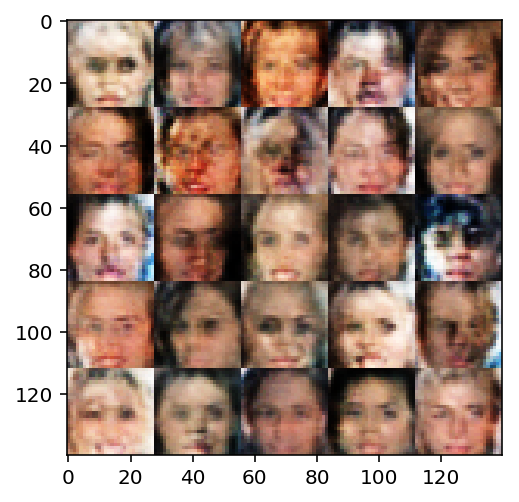

Epoch 1/1... Discriminator Loss: 0.5380... Generator Loss: 3.3280
Epoch 1/1... Discriminator Loss: 0.3143... Generator Loss: 2.4368
Epoch 1/1... Discriminator Loss: 0.5237... Generator Loss: 2.0973
Epoch 1/1... Discriminator Loss: 0.3851... Generator Loss: 2.2894
Epoch 1/1... Discriminator Loss: 0.5184... Generator Loss: 3.0085
Epoch 1/1... Discriminator Loss: 0.5203... Generator Loss: 1.3996
Epoch 1/1... Discriminator Loss: 0.3802... Generator Loss: 2.3036
Epoch 1/1... Discriminator Loss: 0.5722... Generator Loss: 1.2110
Epoch 1/1... Discriminator Loss: 0.4887... Generator Loss: 1.3754
Epoch 1/1... Discriminator Loss: 0.3220... Generator Loss: 2.7245


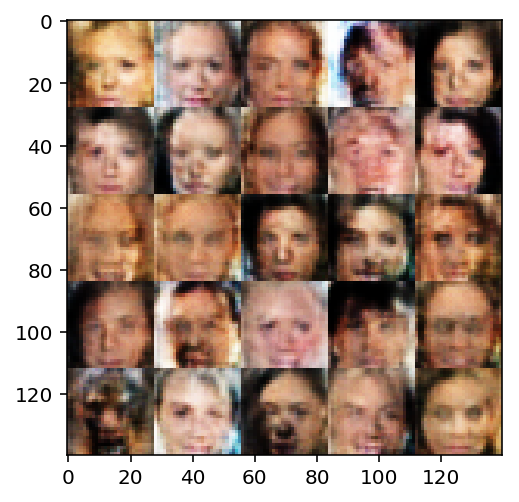

Epoch 1/1... Discriminator Loss: 0.5323... Generator Loss: 2.9946
Epoch 1/1... Discriminator Loss: 0.4128... Generator Loss: 1.6874
Epoch 1/1... Discriminator Loss: 1.9539... Generator Loss: 0.2822
Epoch 1/1... Discriminator Loss: 0.4638... Generator Loss: 1.6796
Epoch 1/1... Discriminator Loss: 0.8157... Generator Loss: 0.9844
Epoch 1/1... Discriminator Loss: 0.3182... Generator Loss: 1.9762
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.7398
Epoch 1/1... Discriminator Loss: 0.8905... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 0.4677... Generator Loss: 1.4961
Epoch 1/1... Discriminator Loss: 0.5312... Generator Loss: 1.3174


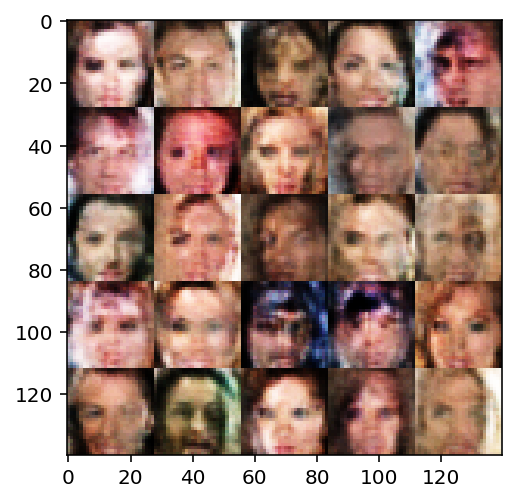

Epoch 1/1... Discriminator Loss: 0.4513... Generator Loss: 2.9034
Epoch 1/1... Discriminator Loss: 0.5682... Generator Loss: 1.2747
Epoch 1/1... Discriminator Loss: 0.2826... Generator Loss: 2.2778
Epoch 1/1... Discriminator Loss: 0.3233... Generator Loss: 3.6655
Epoch 1/1... Discriminator Loss: 0.3382... Generator Loss: 2.6303
Epoch 1/1... Discriminator Loss: 0.5232... Generator Loss: 1.3336
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 0.7946
Epoch 1/1... Discriminator Loss: 1.0202... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 0.4020... Generator Loss: 1.8332
Epoch 1/1... Discriminator Loss: 0.6172... Generator Loss: 3.1893


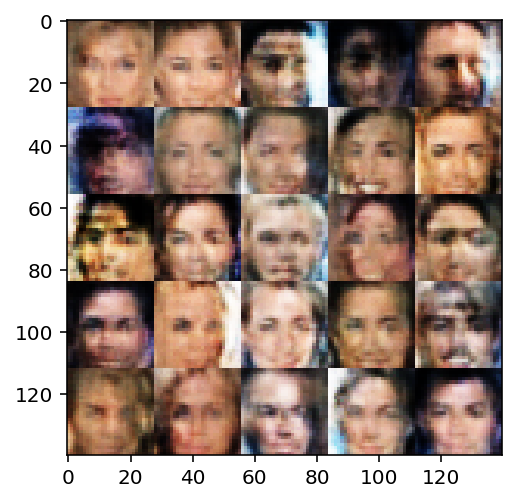

Epoch 1/1... Discriminator Loss: 1.0354... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 0.8168... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 1.0704... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 0.6087... Generator Loss: 1.1329
Epoch 1/1... Discriminator Loss: 0.4868... Generator Loss: 1.4120
Epoch 1/1... Discriminator Loss: 0.5289... Generator Loss: 1.3794
Epoch 1/1... Discriminator Loss: 0.5833... Generator Loss: 1.2211
Epoch 1/1... Discriminator Loss: 0.6452... Generator Loss: 2.1793
Epoch 1/1... Discriminator Loss: 0.7748... Generator Loss: 0.9505
Epoch 1/1... Discriminator Loss: 0.4804... Generator Loss: 1.5839


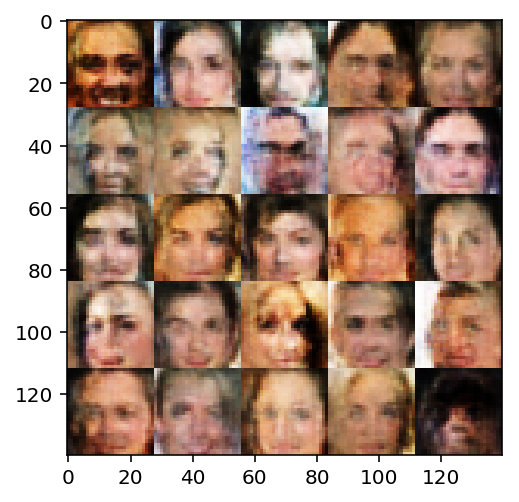

Epoch 1/1... Discriminator Loss: 0.4406... Generator Loss: 1.7452
Epoch 1/1... Discriminator Loss: 0.6766... Generator Loss: 1.0092
Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 1.5978
Epoch 1/1... Discriminator Loss: 0.3980... Generator Loss: 1.7555
Epoch 1/1... Discriminator Loss: 0.6882... Generator Loss: 1.1962
Epoch 1/1... Discriminator Loss: 0.4500... Generator Loss: 1.4811
Epoch 1/1... Discriminator Loss: 1.1873... Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 0.7883... Generator Loss: 0.9066
Epoch 1/1... Discriminator Loss: 0.3655... Generator Loss: 2.1870
Epoch 1/1... Discriminator Loss: 0.5397... Generator Loss: 1.2581


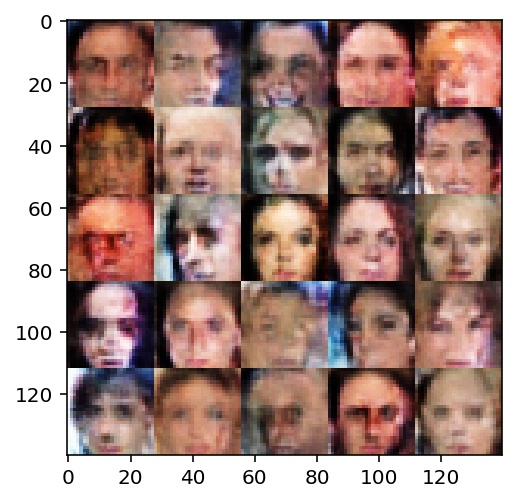

Epoch 1/1... Discriminator Loss: 0.7327... Generator Loss: 1.0257
Epoch 1/1... Discriminator Loss: 0.4851... Generator Loss: 1.6304
Epoch 1/1... Discriminator Loss: 0.4477... Generator Loss: 2.6871
Epoch 1/1... Discriminator Loss: 2.0169... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 0.4679... Generator Loss: 1.9514
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 0.5642... Generator Loss: 1.5391
Epoch 1/1... Discriminator Loss: 0.3278... Generator Loss: 2.0335
Epoch 1/1... Discriminator Loss: 0.3871... Generator Loss: 2.2462
Epoch 1/1... Discriminator Loss: 0.5763... Generator Loss: 1.1470


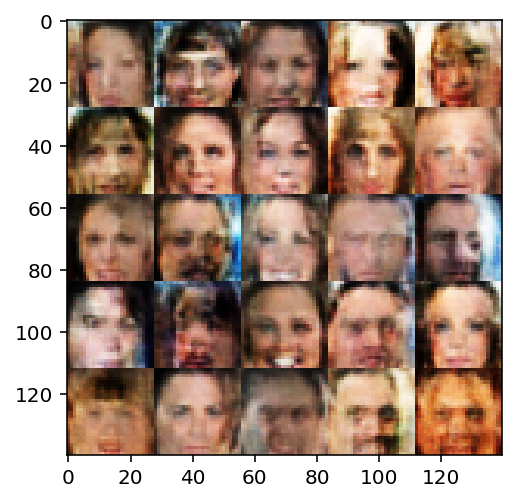

Epoch 1/1... Discriminator Loss: 0.9384... Generator Loss: 0.7146
Epoch 1/1... Discriminator Loss: 0.5301... Generator Loss: 2.0671
Epoch 1/1... Discriminator Loss: 0.3893... Generator Loss: 1.6927
Epoch 1/1... Discriminator Loss: 0.6733... Generator Loss: 3.4285
Epoch 1/1... Discriminator Loss: 0.8645... Generator Loss: 0.7911
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 0.3084
Epoch 1/1... Discriminator Loss: 0.7373... Generator Loss: 1.3054
Epoch 1/1... Discriminator Loss: 0.4272... Generator Loss: 1.9834
Epoch 1/1... Discriminator Loss: 1.2971... Generator Loss: 0.4805
Epoch 1/1... Discriminator Loss: 0.5488... Generator Loss: 4.2695


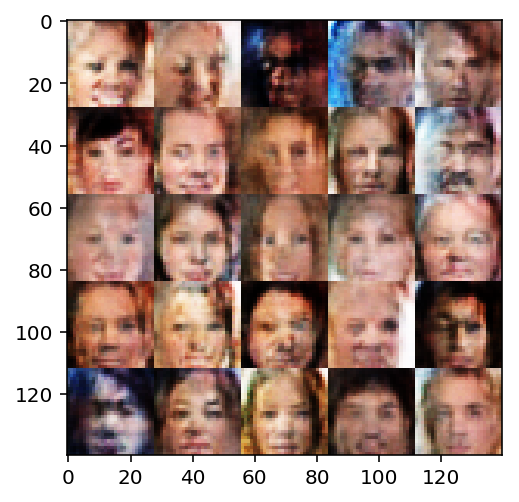

Epoch 1/1... Discriminator Loss: 0.8653... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 0.5841... Generator Loss: 1.4357
Epoch 1/1... Discriminator Loss: 0.9413... Generator Loss: 0.6640
Epoch 1/1... Discriminator Loss: 0.5719... Generator Loss: 1.1770
Epoch 1/1... Discriminator Loss: 0.6416... Generator Loss: 1.1708
Epoch 1/1... Discriminator Loss: 0.4355... Generator Loss: 2.2873
Epoch 1/1... Discriminator Loss: 0.7327... Generator Loss: 0.9183
Epoch 1/1... Discriminator Loss: 0.5233... Generator Loss: 1.2822
Epoch 1/1... Discriminator Loss: 0.4567... Generator Loss: 2.0549
Epoch 1/1... Discriminator Loss: 1.7722... Generator Loss: 0.3434


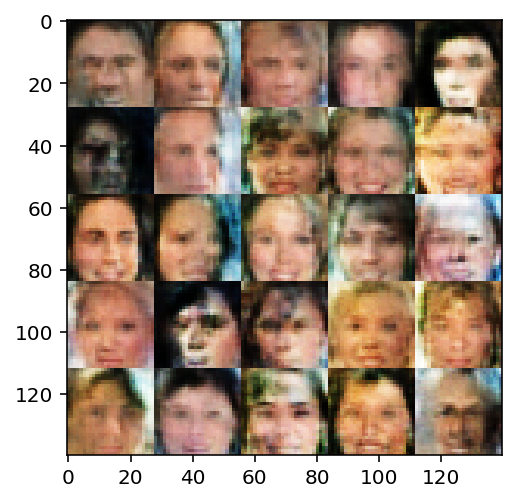

Epoch 1/1... Discriminator Loss: 0.8255... Generator Loss: 0.9185
Epoch 1/1... Discriminator Loss: 1.0907... Generator Loss: 0.6279
Epoch 1/1... Discriminator Loss: 0.7397... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 0.8706... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 0.8952
Epoch 1/1... Discriminator Loss: 0.3817... Generator Loss: 1.7212
Epoch 1/1... Discriminator Loss: 0.6524... Generator Loss: 3.2754
Epoch 1/1... Discriminator Loss: 1.4626... Generator Loss: 0.3974
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 1.4123
Epoch 1/1... Discriminator Loss: 0.6324... Generator Loss: 1.2676


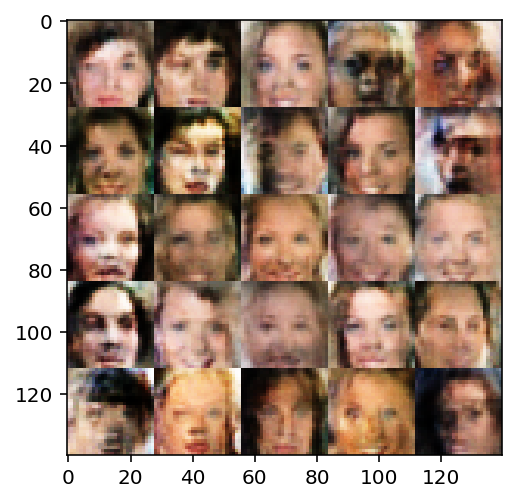

Epoch 1/1... Discriminator Loss: 0.5018... Generator Loss: 2.3286
Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.5438
Epoch 1/1... Discriminator Loss: 0.4114... Generator Loss: 1.8009
Epoch 1/1... Discriminator Loss: 0.8760... Generator Loss: 0.7067
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 0.5929
Epoch 1/1... Discriminator Loss: 0.5010... Generator Loss: 1.4536
Epoch 1/1... Discriminator Loss: 0.6225... Generator Loss: 1.1978
Epoch 1/1... Discriminator Loss: 0.7115... Generator Loss: 1.0625
Epoch 1/1... Discriminator Loss: 0.3375... Generator Loss: 2.0606


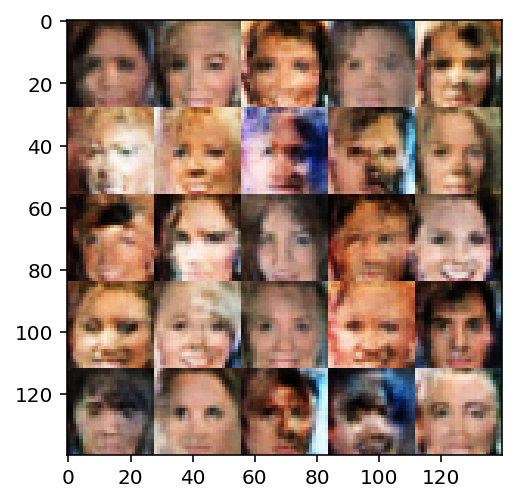

Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 0.7355
Epoch 1/1... Discriminator Loss: 0.5250... Generator Loss: 1.4233
Epoch 1/1... Discriminator Loss: 0.5297... Generator Loss: 1.3025
Epoch 1/1... Discriminator Loss: 0.7271... Generator Loss: 2.4398
Epoch 1/1... Discriminator Loss: 0.3161... Generator Loss: 2.9775
Epoch 1/1... Discriminator Loss: 0.3288... Generator Loss: 2.5960
Epoch 1/1... Discriminator Loss: 0.9134... Generator Loss: 4.7099
Epoch 1/1... Discriminator Loss: 0.6549... Generator Loss: 1.3499
Epoch 1/1... Discriminator Loss: 0.3934... Generator Loss: 1.9053
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.1211


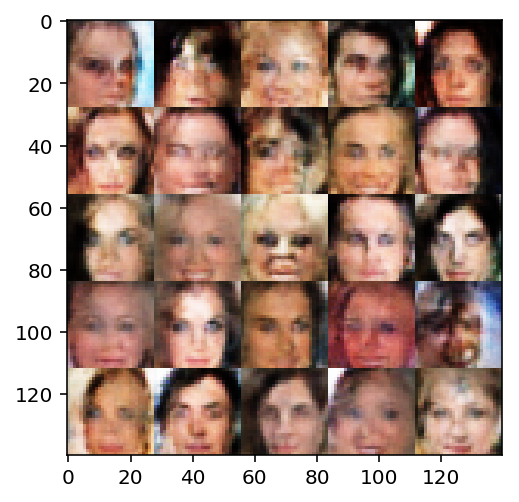

Epoch 1/1... Discriminator Loss: 0.5043... Generator Loss: 1.5105
Epoch 1/1... Discriminator Loss: 0.6382... Generator Loss: 1.1722
Epoch 1/1... Discriminator Loss: 0.4759... Generator Loss: 1.4694
Epoch 1/1... Discriminator Loss: 0.4386... Generator Loss: 1.5927
Epoch 1/1... Discriminator Loss: 0.4987... Generator Loss: 1.3874
Epoch 1/1... Discriminator Loss: 0.6601... Generator Loss: 1.0883
Epoch 1/1... Discriminator Loss: 0.5340... Generator Loss: 1.6849
Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 0.3589
Epoch 1/1... Discriminator Loss: 1.4118... Generator Loss: 6.2487
Epoch 1/1... Discriminator Loss: 0.5122... Generator Loss: 1.4463


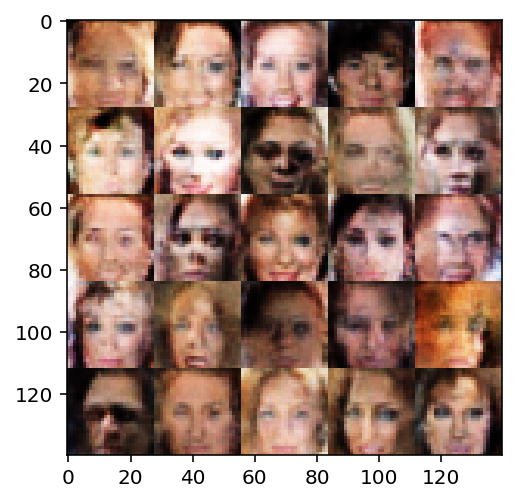

Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.6805
Epoch 1/1... Discriminator Loss: 0.6188... Generator Loss: 1.4125
Epoch 1/1... Discriminator Loss: 0.5462... Generator Loss: 3.8890
Epoch 1/1... Discriminator Loss: 0.4263... Generator Loss: 1.6687
Epoch 1/1... Discriminator Loss: 0.5112... Generator Loss: 1.6479
Epoch 1/1... Discriminator Loss: 0.3742... Generator Loss: 2.6346
Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 1.1210
Epoch 1/1... Discriminator Loss: 0.3405... Generator Loss: 2.1121
Epoch 1/1... Discriminator Loss: 0.6126... Generator Loss: 1.2103
Epoch 1/1... Discriminator Loss: 0.3831... Generator Loss: 3.5837


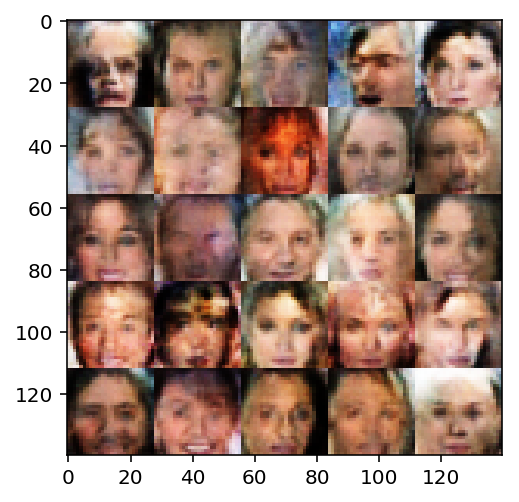

Epoch 1/1... Discriminator Loss: 0.5504... Generator Loss: 1.2096
Epoch 1/1... Discriminator Loss: 0.7212... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.4266
Epoch 1/1... Discriminator Loss: 0.4252... Generator Loss: 2.2081
Epoch 1/1... Discriminator Loss: 0.6536... Generator Loss: 1.1076
Epoch 1/1... Discriminator Loss: 0.3692... Generator Loss: 2.0813
Epoch 1/1... Discriminator Loss: 0.3162... Generator Loss: 2.4758
Epoch 1/1... Discriminator Loss: 0.5191... Generator Loss: 1.3612
Epoch 1/1... Discriminator Loss: 0.7766... Generator Loss: 0.9421
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 0.7806


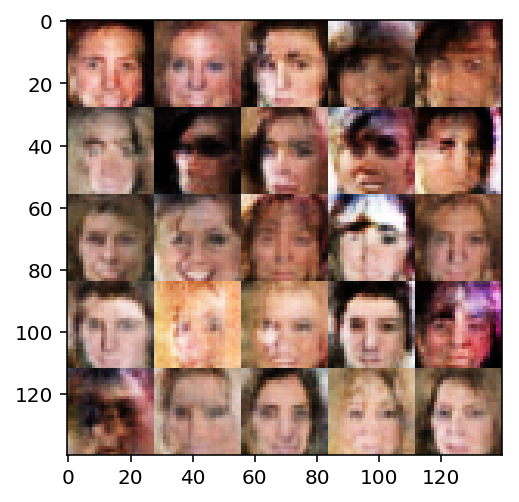

Epoch 1/1... Discriminator Loss: 0.8270... Generator Loss: 4.5270
Epoch 1/1... Discriminator Loss: 0.8820... Generator Loss: 0.8387
Epoch 1/1... Discriminator Loss: 0.7118... Generator Loss: 0.9940
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 1.5057
Epoch 1/1... Discriminator Loss: 0.7848... Generator Loss: 0.8657
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.6638
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 0.8538
Epoch 1/1... Discriminator Loss: 0.2650... Generator Loss: 2.8909
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 2.8430
Epoch 1/1... Discriminator Loss: 0.6562... Generator Loss: 1.0656


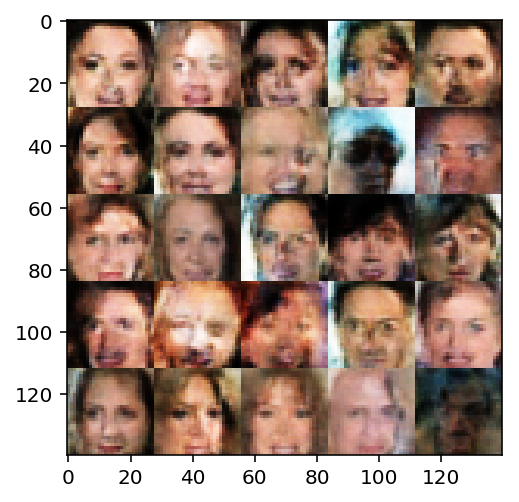

Epoch 1/1... Discriminator Loss: 0.7910... Generator Loss: 0.8251
Epoch 1/1... Discriminator Loss: 0.6477... Generator Loss: 1.1583
Epoch 1/1... Discriminator Loss: 0.3417... Generator Loss: 1.8067
Epoch 1/1... Discriminator Loss: 0.4643... Generator Loss: 1.5608
Epoch 1/1... Discriminator Loss: 0.8515... Generator Loss: 0.8199
Epoch 1/1... Discriminator Loss: 0.6596... Generator Loss: 1.0968
Epoch 1/1... Discriminator Loss: 1.1553... Generator Loss: 0.6456
Epoch 1/1... Discriminator Loss: 0.5194... Generator Loss: 3.1399
Epoch 1/1... Discriminator Loss: 1.2321... Generator Loss: 0.6232
Epoch 1/1... Discriminator Loss: 0.4813... Generator Loss: 1.7477


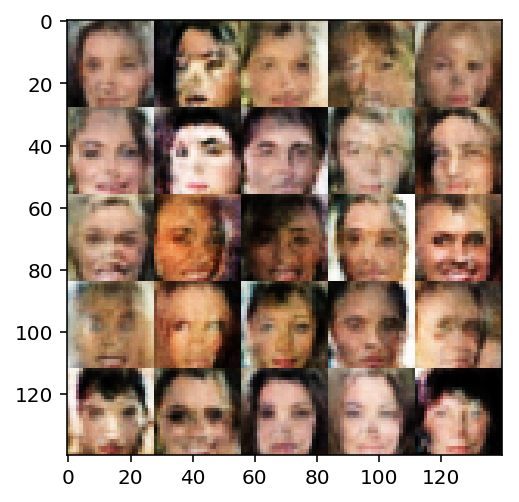

Epoch 1/1... Discriminator Loss: 0.5226... Generator Loss: 1.3360
Epoch 1/1... Discriminator Loss: 0.3701... Generator Loss: 2.1771
Epoch 1/1... Discriminator Loss: 0.5438... Generator Loss: 2.3356
Epoch 1/1... Discriminator Loss: 0.5953... Generator Loss: 1.1671
Epoch 1/1... Discriminator Loss: 0.3180... Generator Loss: 3.1864
Epoch 1/1... Discriminator Loss: 0.2999... Generator Loss: 2.5551
Epoch 1/1... Discriminator Loss: 0.4478... Generator Loss: 1.4624
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 1.6939
Epoch 1/1... Discriminator Loss: 0.7213... Generator Loss: 1.0350
Epoch 1/1... Discriminator Loss: 0.5560... Generator Loss: 1.2613


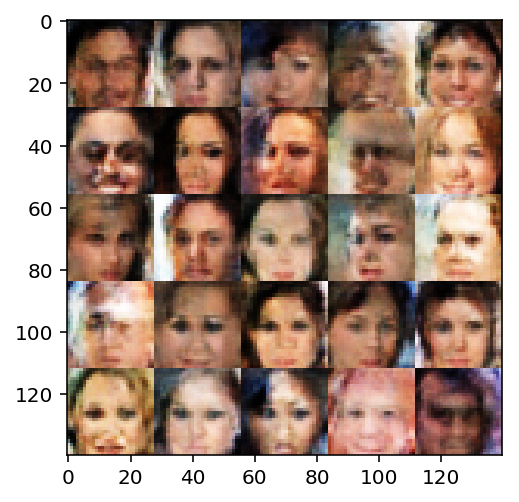

Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 0.2623... Generator Loss: 3.1598
Epoch 1/1... Discriminator Loss: 0.4703... Generator Loss: 1.6672
Epoch 1/1... Discriminator Loss: 0.8508... Generator Loss: 0.8686
Epoch 1/1... Discriminator Loss: 0.4052... Generator Loss: 1.6663
Epoch 1/1... Discriminator Loss: 0.5532... Generator Loss: 1.4418
Epoch 1/1... Discriminator Loss: 0.4252... Generator Loss: 1.7607
Epoch 1/1... Discriminator Loss: 0.8037... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 0.6590... Generator Loss: 1.1342
Epoch 1/1... Discriminator Loss: 0.5312... Generator Loss: 1.9698


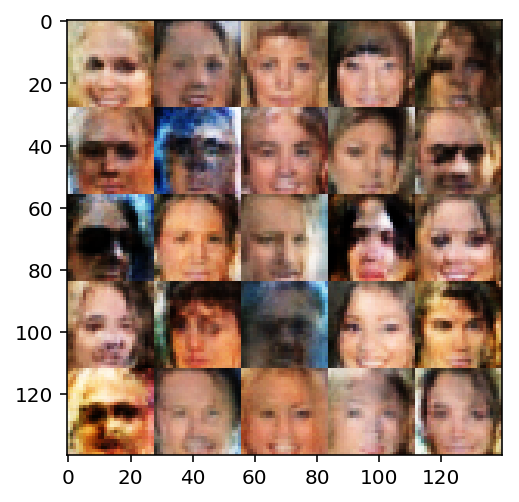

Epoch 1/1... Discriminator Loss: 0.6879... Generator Loss: 0.9730
Epoch 1/1... Discriminator Loss: 0.5352... Generator Loss: 1.4386
Epoch 1/1... Discriminator Loss: 0.4933... Generator Loss: 1.6119
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.4994
Epoch 1/1... Discriminator Loss: 1.8157... Generator Loss: 0.2508
Epoch 1/1... Discriminator Loss: 0.8528... Generator Loss: 1.1265
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.4562
Epoch 1/1... Discriminator Loss: 0.3859... Generator Loss: 2.4308
Epoch 1/1... Discriminator Loss: 0.3574... Generator Loss: 2.0562
Epoch 1/1... Discriminator Loss: 1.0710... Generator Loss: 0.6125


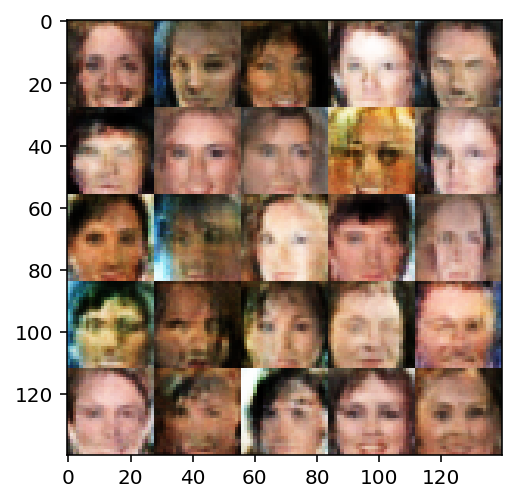

Epoch 1/1... Discriminator Loss: 0.6882... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 0.9791... Generator Loss: 0.6364
Epoch 1/1... Discriminator Loss: 1.1401... Generator Loss: 0.6458
Epoch 1/1... Discriminator Loss: 1.8659... Generator Loss: 0.2810
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 0.8116
Epoch 1/1... Discriminator Loss: 0.5167... Generator Loss: 2.1028
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 0.6525
Epoch 1/1... Discriminator Loss: 0.4235... Generator Loss: 1.6478
Epoch 1/1... Discriminator Loss: 0.7256... Generator Loss: 3.5352
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 1.3945


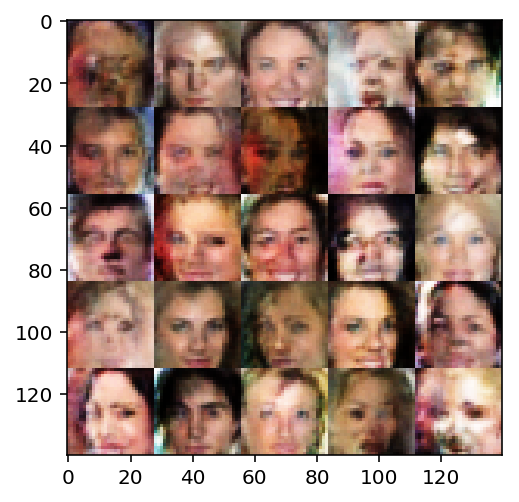

Epoch 1/1... Discriminator Loss: 0.4675... Generator Loss: 2.5549
Epoch 1/1... Discriminator Loss: 0.4586... Generator Loss: 1.5442
Epoch 1/1... Discriminator Loss: 0.4364... Generator Loss: 1.6828
Epoch 1/1... Discriminator Loss: 0.5721... Generator Loss: 1.3155
Epoch 1/1... Discriminator Loss: 0.7521... Generator Loss: 0.9262
Epoch 1/1... Discriminator Loss: 0.3463... Generator Loss: 2.3228
Epoch 1/1... Discriminator Loss: 1.5649... Generator Loss: 0.3700
Epoch 1/1... Discriminator Loss: 0.4381... Generator Loss: 1.6941
Epoch 1/1... Discriminator Loss: 0.6116... Generator Loss: 1.2298
Epoch 1/1... Discriminator Loss: 0.8351... Generator Loss: 0.8078


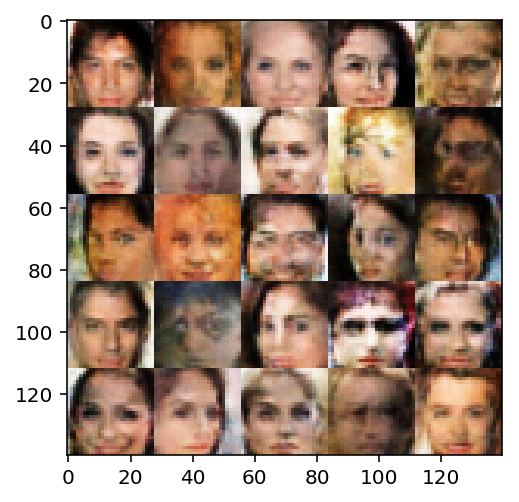

Epoch 1/1... Discriminator Loss: 0.5108... Generator Loss: 2.4559
Epoch 1/1... Discriminator Loss: 0.4037... Generator Loss: 1.8005
Epoch 1/1... Discriminator Loss: 0.3934... Generator Loss: 1.6979
Epoch 1/1... Discriminator Loss: 0.5050... Generator Loss: 1.3398
Epoch 1/1... Discriminator Loss: 1.0840... Generator Loss: 0.7480
Epoch 1/1... Discriminator Loss: 0.5935... Generator Loss: 1.2871
Epoch 1/1... Discriminator Loss: 0.7671... Generator Loss: 0.9569
Epoch 1/1... Discriminator Loss: 0.9605... Generator Loss: 0.7299
Epoch 1/1... Discriminator Loss: 0.8030... Generator Loss: 0.9080
Epoch 1/1... Discriminator Loss: 0.9763... Generator Loss: 0.6940


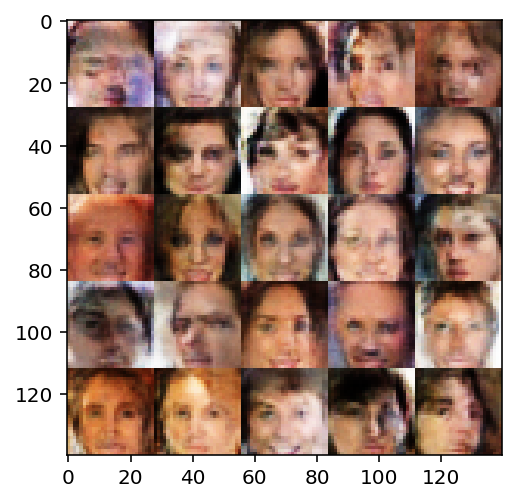

Epoch 1/1... Discriminator Loss: 0.8572... Generator Loss: 0.8782
Epoch 1/1... Discriminator Loss: 0.4346... Generator Loss: 1.7179
Epoch 1/1... Discriminator Loss: 0.6371... Generator Loss: 1.1534
Epoch 1/1... Discriminator Loss: 0.4374... Generator Loss: 1.5118
Epoch 1/1... Discriminator Loss: 0.8851... Generator Loss: 0.8406
Epoch 1/1... Discriminator Loss: 0.2345... Generator Loss: 2.9938
Epoch 1/1... Discriminator Loss: 0.5222... Generator Loss: 1.5791
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 1.4994
Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 0.6630
Epoch 1/1... Discriminator Loss: 0.9918... Generator Loss: 0.7466


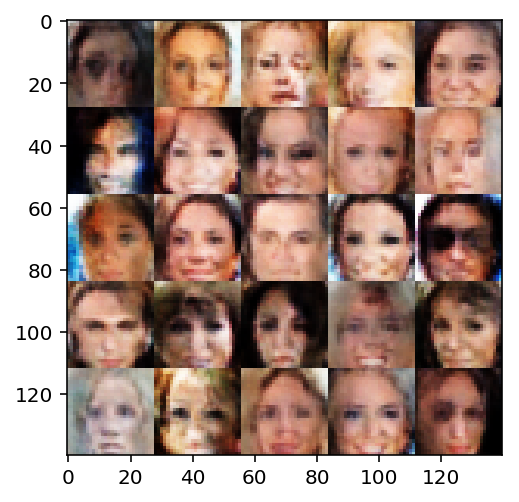

Epoch 1/1... Discriminator Loss: 1.0610... Generator Loss: 0.7406
Epoch 1/1... Discriminator Loss: 0.7004... Generator Loss: 1.0152
Epoch 1/1... Discriminator Loss: 0.4338... Generator Loss: 1.7442
Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 1.2237
Epoch 1/1... Discriminator Loss: 1.2692... Generator Loss: 0.4981
Epoch 1/1... Discriminator Loss: 0.8936... Generator Loss: 0.7007
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.6210
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 5.1082
Epoch 1/1... Discriminator Loss: 0.5372... Generator Loss: 1.3458
Epoch 1/1... Discriminator Loss: 0.9930... Generator Loss: 4.5411


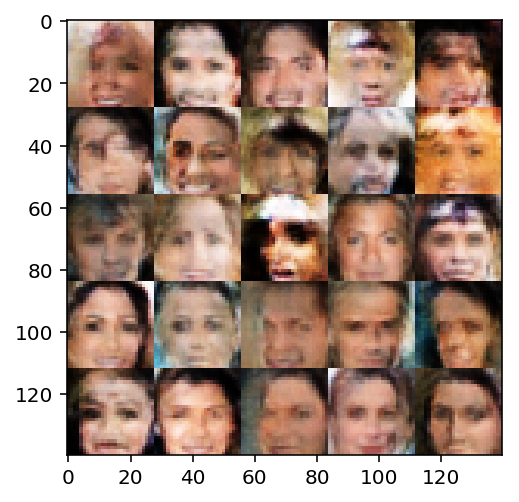

Epoch 1/1... Discriminator Loss: 0.7305... Generator Loss: 3.3469
Epoch 1/1... Discriminator Loss: 0.9008... Generator Loss: 0.7247
Epoch 1/1... Discriminator Loss: 0.3651... Generator Loss: 1.9615
Epoch 1/1... Discriminator Loss: 0.3760... Generator Loss: 1.7767
Epoch 1/1... Discriminator Loss: 0.6595... Generator Loss: 1.0475
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 0.7390
Epoch 1/1... Discriminator Loss: 0.5503... Generator Loss: 1.2994
Epoch 1/1... Discriminator Loss: 0.4545... Generator Loss: 2.8545
Epoch 1/1... Discriminator Loss: 0.3400... Generator Loss: 2.1880
Epoch 1/1... Discriminator Loss: 0.8386... Generator Loss: 0.8645


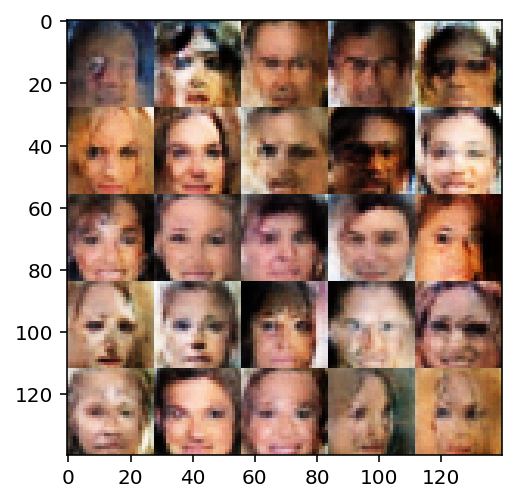

Epoch 1/1... Discriminator Loss: 0.5411... Generator Loss: 1.3951
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 3.0724
Epoch 1/1... Discriminator Loss: 0.6383... Generator Loss: 1.0287
Epoch 1/1... Discriminator Loss: 0.7674... Generator Loss: 0.9228
Epoch 1/1... Discriminator Loss: 1.3202... Generator Loss: 0.4770
Epoch 1/1... Discriminator Loss: 0.5666... Generator Loss: 1.3679
Epoch 1/1... Discriminator Loss: 0.6305... Generator Loss: 1.2626
Epoch 1/1... Discriminator Loss: 0.5584... Generator Loss: 1.2711
Epoch 1/1... Discriminator Loss: 0.7802... Generator Loss: 0.8973
Epoch 1/1... Discriminator Loss: 0.4445... Generator Loss: 1.5682


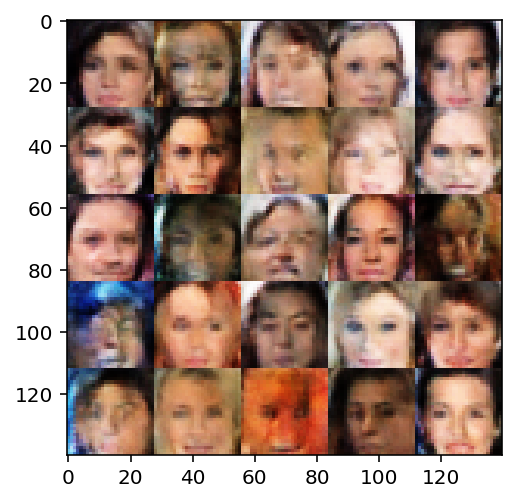

Epoch 1/1... Discriminator Loss: 0.8440... Generator Loss: 0.9040
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 0.4433
Epoch 1/1... Discriminator Loss: 0.8837... Generator Loss: 0.7921
Epoch 1/1... Discriminator Loss: 0.3989... Generator Loss: 2.3627
Epoch 1/1... Discriminator Loss: 0.5278... Generator Loss: 1.3960
Epoch 1/1... Discriminator Loss: 0.4180... Generator Loss: 1.5714
Epoch 1/1... Discriminator Loss: 0.7454... Generator Loss: 0.9553
Epoch 1/1... Discriminator Loss: 0.6018... Generator Loss: 1.2648
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 3.1766
Epoch 1/1... Discriminator Loss: 0.4996... Generator Loss: 2.7173


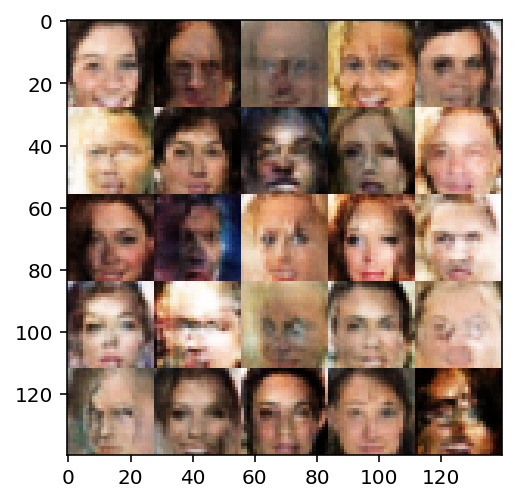

Epoch 1/1... Discriminator Loss: 0.7845... Generator Loss: 1.0348
Epoch 1/1... Discriminator Loss: 0.9180... Generator Loss: 0.7796
Epoch 1/1... Discriminator Loss: 0.7591... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 0.4915... Generator Loss: 2.5723
Epoch 1/1... Discriminator Loss: 0.6964... Generator Loss: 1.1213
Epoch 1/1... Discriminator Loss: 0.5328... Generator Loss: 3.0279
Epoch 1/1... Discriminator Loss: 0.2690... Generator Loss: 2.7338
Epoch 1/1... Discriminator Loss: 0.5651... Generator Loss: 1.2247
Epoch 1/1... Discriminator Loss: 0.6943... Generator Loss: 1.0471
Epoch 1/1... Discriminator Loss: 0.9606... Generator Loss: 0.6582


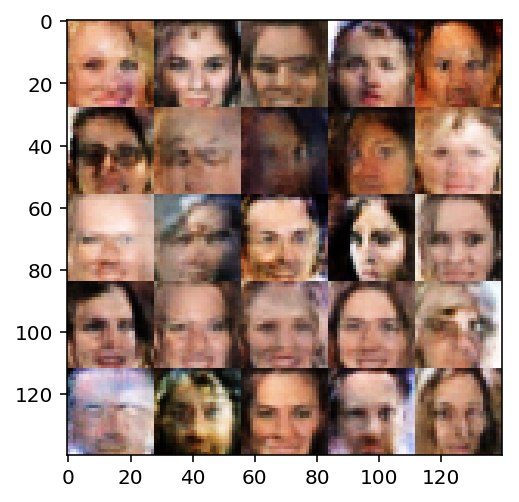

Epoch 1/1... Discriminator Loss: 0.6677... Generator Loss: 1.0214
Epoch 1/1... Discriminator Loss: 0.8067... Generator Loss: 0.8412
Epoch 1/1... Discriminator Loss: 0.7438... Generator Loss: 0.9476
Epoch 1/1... Discriminator Loss: 0.5518... Generator Loss: 1.3575
Epoch 1/1... Discriminator Loss: 1.4775... Generator Loss: 0.3821
Epoch 1/1... Discriminator Loss: 0.4807... Generator Loss: 1.4724
Epoch 1/1... Discriminator Loss: 0.4583... Generator Loss: 2.7849
Epoch 1/1... Discriminator Loss: 0.6530... Generator Loss: 2.4673
Epoch 1/1... Discriminator Loss: 0.3469... Generator Loss: 2.7710
Epoch 1/1... Discriminator Loss: 0.4941... Generator Loss: 1.4955


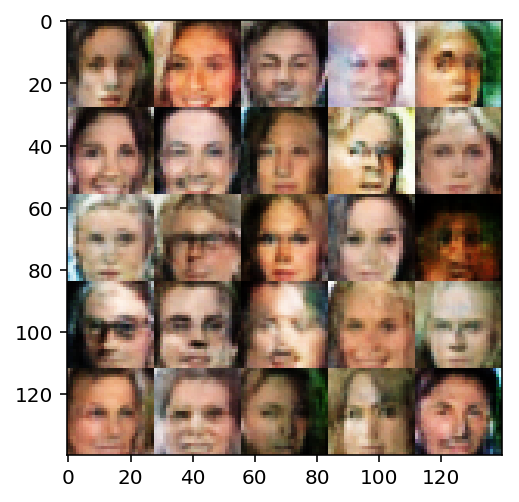

Epoch 1/1... Discriminator Loss: 0.5290... Generator Loss: 1.2972
Epoch 1/1... Discriminator Loss: 0.5664... Generator Loss: 1.6218
Epoch 1/1... Discriminator Loss: 0.2922... Generator Loss: 2.0993
Epoch 1/1... Discriminator Loss: 1.4964... Generator Loss: 5.1921
Epoch 1/1... Discriminator Loss: 1.3960... Generator Loss: 4.0809
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 0.8192
Epoch 1/1... Discriminator Loss: 0.4830... Generator Loss: 1.8890
Epoch 1/1... Discriminator Loss: 0.5808... Generator Loss: 1.5019
Epoch 1/1... Discriminator Loss: 0.8302... Generator Loss: 3.1497
Epoch 1/1... Discriminator Loss: 1.0675... Generator Loss: 0.5923


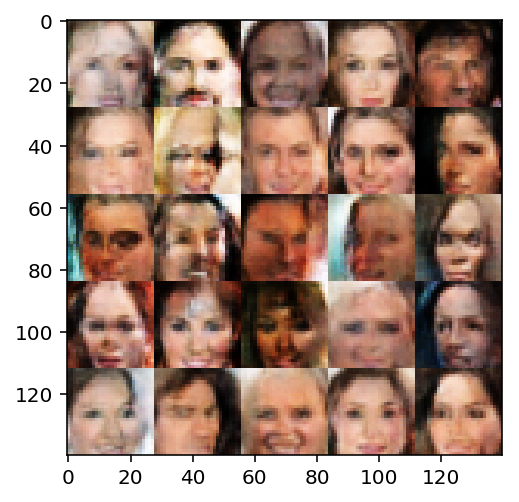

Epoch 1/1... Discriminator Loss: 0.5338... Generator Loss: 1.3954
Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.6767
Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 1.8200
Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 1.3669
Epoch 1/1... Discriminator Loss: 0.5333... Generator Loss: 1.5439
Epoch 1/1... Discriminator Loss: 1.3787... Generator Loss: 0.4001
Epoch 1/1... Discriminator Loss: 0.4622... Generator Loss: 1.6130
Epoch 1/1... Discriminator Loss: 0.5410... Generator Loss: 1.3198
Epoch 1/1... Discriminator Loss: 0.3401... Generator Loss: 1.8694
Epoch 1/1... Discriminator Loss: 1.2270... Generator Loss: 0.4833


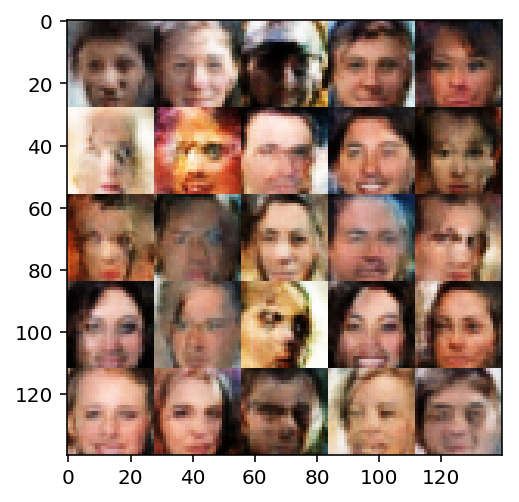

Epoch 1/1... Discriminator Loss: 0.4014... Generator Loss: 1.8806
Epoch 1/1... Discriminator Loss: 0.3115... Generator Loss: 2.1994
Epoch 1/1... Discriminator Loss: 0.4706... Generator Loss: 1.6304
Epoch 1/1... Discriminator Loss: 0.4605... Generator Loss: 1.7880
Epoch 1/1... Discriminator Loss: 0.6265... Generator Loss: 1.1449
Epoch 1/1... Discriminator Loss: 0.7256... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 0.9736
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 0.8530
Epoch 1/1... Discriminator Loss: 0.9562... Generator Loss: 0.7382
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 0.6715


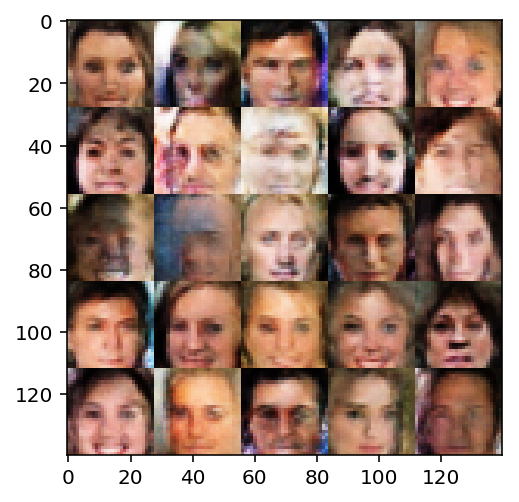

Epoch 1/1... Discriminator Loss: 0.3593... Generator Loss: 1.9193
Epoch 1/1... Discriminator Loss: 0.5649... Generator Loss: 1.2691
Epoch 1/1... Discriminator Loss: 0.6791... Generator Loss: 1.1550
Epoch 1/1... Discriminator Loss: 1.9138... Generator Loss: 0.2218
Epoch 1/1... Discriminator Loss: 0.4569... Generator Loss: 1.5484
Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 0.6197
Epoch 1/1... Discriminator Loss: 1.1164... Generator Loss: 0.6962
Epoch 1/1... Discriminator Loss: 0.7090... Generator Loss: 1.0443
Epoch 1/1... Discriminator Loss: 0.5262... Generator Loss: 1.4944
Epoch 1/1... Discriminator Loss: 0.7758... Generator Loss: 1.0047


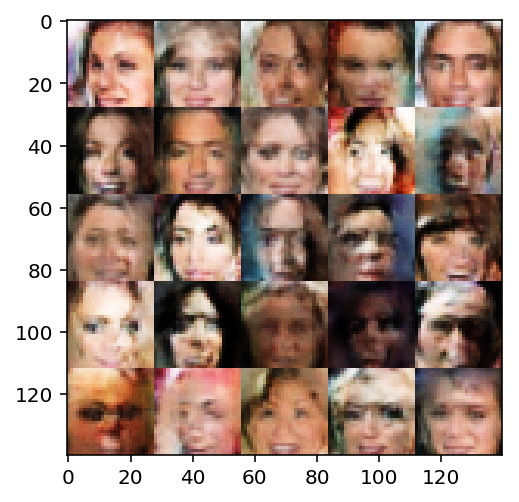

Epoch 1/1... Discriminator Loss: 0.5595... Generator Loss: 1.2365
Epoch 1/1... Discriminator Loss: 0.4176... Generator Loss: 2.0934
Epoch 1/1... Discriminator Loss: 0.2431... Generator Loss: 2.3469
Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 0.6438
Epoch 1/1... Discriminator Loss: 0.6261... Generator Loss: 1.4101
Epoch 1/1... Discriminator Loss: 0.6022... Generator Loss: 1.1893
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 1.3498
Epoch 1/1... Discriminator Loss: 0.8209... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 0.3707... Generator Loss: 2.4235
Epoch 1/1... Discriminator Loss: 0.4634... Generator Loss: 2.7051


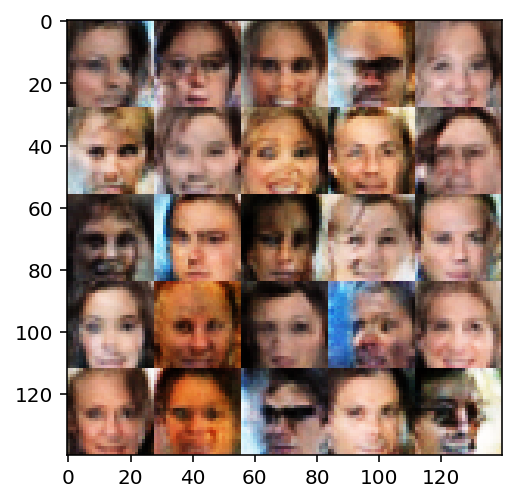

Epoch 1/1... Discriminator Loss: 0.7078... Generator Loss: 1.0811
Epoch 1/1... Discriminator Loss: 0.7138... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 0.5356... Generator Loss: 1.4975
Epoch 1/1... Discriminator Loss: 1.0474... Generator Loss: 0.6332
Epoch 1/1... Discriminator Loss: 0.4776... Generator Loss: 2.3195
Epoch 1/1... Discriminator Loss: 0.6755... Generator Loss: 1.0639
Epoch 1/1... Discriminator Loss: 0.5517... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 1.5479
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 0.6901
Epoch 1/1... Discriminator Loss: 0.4892... Generator Loss: 4.0139


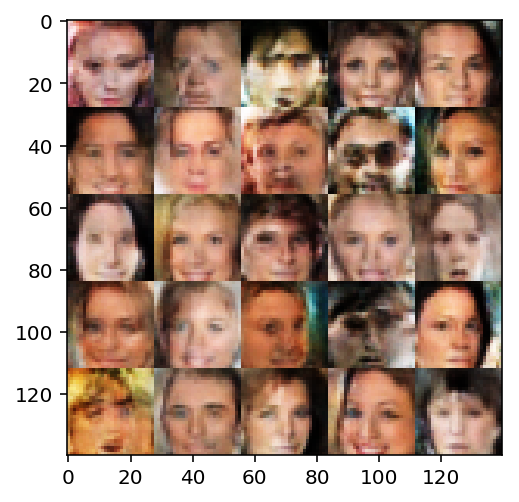

Epoch 1/1... Discriminator Loss: 0.7233... Generator Loss: 1.1276
Epoch 1/1... Discriminator Loss: 2.3066... Generator Loss: 0.2961
Epoch 1/1... Discriminator Loss: 1.0219... Generator Loss: 0.7438
Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 0.7436
Epoch 1/1... Discriminator Loss: 0.8007... Generator Loss: 0.8933
Epoch 1/1... Discriminator Loss: 0.3091... Generator Loss: 2.3978
Epoch 1/1... Discriminator Loss: 0.4391... Generator Loss: 1.5100
Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 0.8342
Epoch 1/1... Discriminator Loss: 1.2829... Generator Loss: 0.5267
Epoch 1/1... Discriminator Loss: 0.9248... Generator Loss: 0.7374


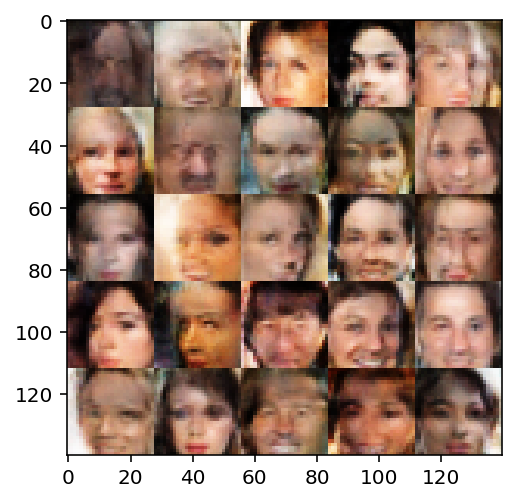

Epoch 1/1... Discriminator Loss: 0.4049... Generator Loss: 1.9867
Epoch 1/1... Discriminator Loss: 0.5345... Generator Loss: 1.3045
Epoch 1/1... Discriminator Loss: 0.3776... Generator Loss: 2.4801
Epoch 1/1... Discriminator Loss: 0.2694... Generator Loss: 2.2895
Epoch 1/1... Discriminator Loss: 0.4989... Generator Loss: 2.6964
Epoch 1/1... Discriminator Loss: 0.9493... Generator Loss: 0.7088
Epoch 1/1... Discriminator Loss: 1.9544... Generator Loss: 5.2614
Epoch 1/1... Discriminator Loss: 0.4333... Generator Loss: 1.6024
Epoch 1/1... Discriminator Loss: 0.3318... Generator Loss: 1.9225
Epoch 1/1... Discriminator Loss: 0.3237... Generator Loss: 2.3859


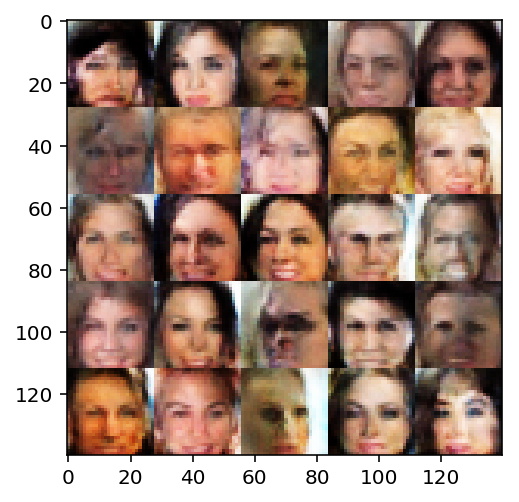

Epoch 1/1... Discriminator Loss: 0.3948... Generator Loss: 1.8972
Epoch 1/1... Discriminator Loss: 0.4947... Generator Loss: 1.5001
Epoch 1/1... Discriminator Loss: 0.9751... Generator Loss: 0.6789
Epoch 1/1... Discriminator Loss: 0.5006... Generator Loss: 1.4355
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 0.8135
Epoch 1/1... Discriminator Loss: 0.4728... Generator Loss: 1.7240
Epoch 1/1... Discriminator Loss: 0.5492... Generator Loss: 1.2921
Epoch 1/1... Discriminator Loss: 0.4122... Generator Loss: 1.7911
Epoch 1/1... Discriminator Loss: 0.8038... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 0.3241... Generator Loss: 1.9343


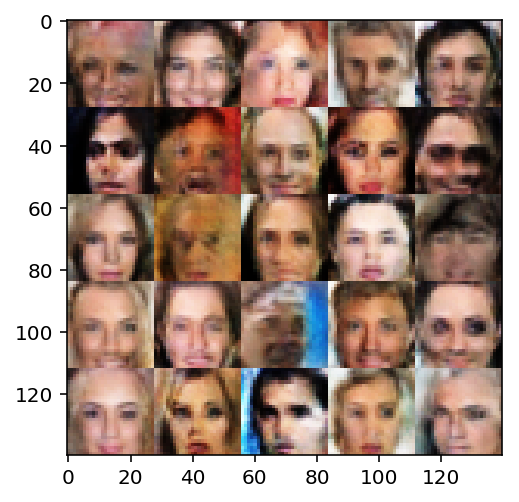

Epoch 1/1... Discriminator Loss: 0.4537... Generator Loss: 1.6888
Epoch 1/1... Discriminator Loss: 1.9303... Generator Loss: 0.2307
Epoch 1/1... Discriminator Loss: 0.3984... Generator Loss: 1.9441
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 0.6427
Epoch 1/1... Discriminator Loss: 0.4192... Generator Loss: 2.0850
Epoch 1/1... Discriminator Loss: 0.5494... Generator Loss: 1.2966
Epoch 1/1... Discriminator Loss: 0.8676... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 0.5983... Generator Loss: 1.2073
Epoch 1/1... Discriminator Loss: 0.5617... Generator Loss: 1.2582
Epoch 1/1... Discriminator Loss: 0.8973... Generator Loss: 0.8162


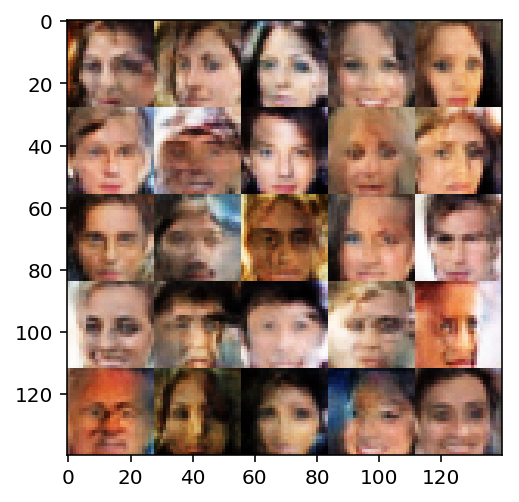

Epoch 1/1... Discriminator Loss: 0.6461... Generator Loss: 1.0842
Epoch 1/1... Discriminator Loss: 0.5647... Generator Loss: 1.2865
Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 1.8969
Epoch 1/1... Discriminator Loss: 1.6664... Generator Loss: 0.3932
Epoch 1/1... Discriminator Loss: 1.0261... Generator Loss: 0.7597
Epoch 1/1... Discriminator Loss: 2.0538... Generator Loss: 0.2483
Epoch 1/1... Discriminator Loss: 0.6346... Generator Loss: 1.0809
Epoch 1/1... Discriminator Loss: 0.7039... Generator Loss: 0.9871
Epoch 1/1... Discriminator Loss: 1.1791... Generator Loss: 0.6201
Epoch 1/1... Discriminator Loss: 0.5515... Generator Loss: 1.4208


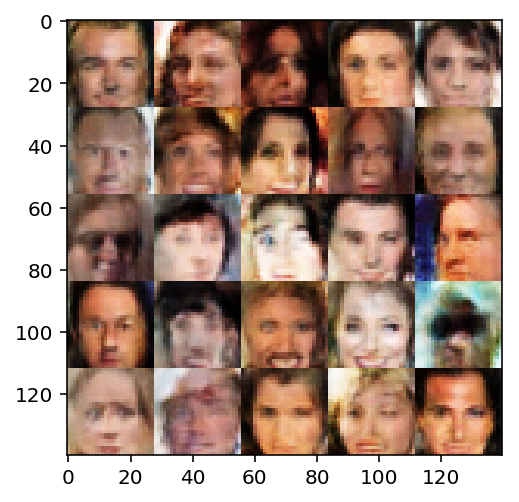

Epoch 1/1... Discriminator Loss: 0.7895... Generator Loss: 4.3549
Epoch 1/1... Discriminator Loss: 1.4234... Generator Loss: 0.4144
Epoch 1/1... Discriminator Loss: 0.6919... Generator Loss: 1.0485
Epoch 1/1... Discriminator Loss: 0.7081... Generator Loss: 1.0721
Epoch 1/1... Discriminator Loss: 0.4515... Generator Loss: 1.7075
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 0.5545... Generator Loss: 1.2698
Epoch 1/1... Discriminator Loss: 0.4862... Generator Loss: 1.8396
Epoch 1/1... Discriminator Loss: 0.4010... Generator Loss: 1.7100
Epoch 1/1... Discriminator Loss: 0.8345... Generator Loss: 0.9981


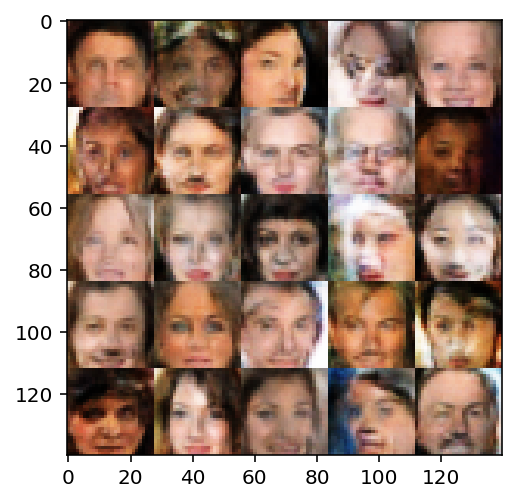

Epoch 1/1... Discriminator Loss: 0.8403... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 0.4472... Generator Loss: 1.6039
Epoch 1/1... Discriminator Loss: 0.6915... Generator Loss: 1.0452
Epoch 1/1... Discriminator Loss: 0.4921... Generator Loss: 2.3085
Epoch 1/1... Discriminator Loss: 0.6479... Generator Loss: 1.1140
Epoch 1/1... Discriminator Loss: 0.8620... Generator Loss: 0.8040
Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 0.7808
Epoch 1/1... Discriminator Loss: 1.1083... Generator Loss: 0.6308
Epoch 1/1... Discriminator Loss: 1.1420... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.0249... Generator Loss: 0.6676


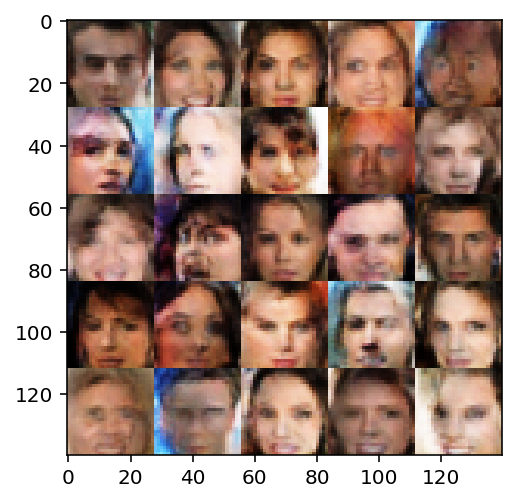

Epoch 1/1... Discriminator Loss: 0.4028... Generator Loss: 2.6471
Epoch 1/1... Discriminator Loss: 0.8473... Generator Loss: 0.8105
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 4.4503
Epoch 1/1... Discriminator Loss: 0.6617... Generator Loss: 3.1212
Epoch 1/1... Discriminator Loss: 0.7577... Generator Loss: 1.2846
Epoch 1/1... Discriminator Loss: 0.7058... Generator Loss: 1.0968
Epoch 1/1... Discriminator Loss: 0.6084... Generator Loss: 1.2473
Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 1.1417
Epoch 1/1... Discriminator Loss: 0.4613... Generator Loss: 1.4843
Epoch 1/1... Discriminator Loss: 1.1404... Generator Loss: 0.5561


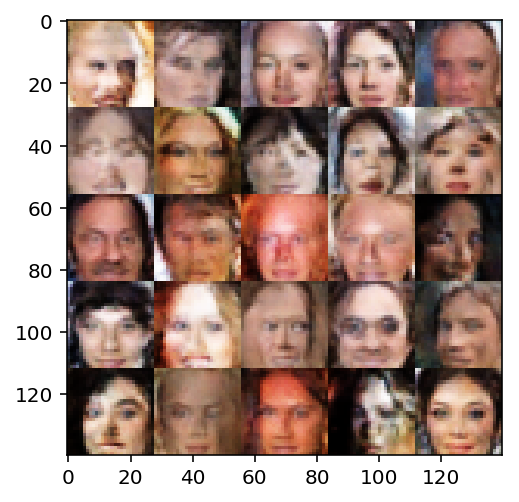

Epoch 1/1... Discriminator Loss: 0.6136... Generator Loss: 1.0983
Epoch 1/1... Discriminator Loss: 0.3811... Generator Loss: 2.2024
Epoch 1/1... Discriminator Loss: 1.3795... Generator Loss: 0.4215
Epoch 1/1... Discriminator Loss: 0.3980... Generator Loss: 1.7981
Epoch 1/1... Discriminator Loss: 0.5745... Generator Loss: 1.3489
Epoch 1/1... Discriminator Loss: 0.6292... Generator Loss: 1.1453
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 2.1701
Epoch 1/1... Discriminator Loss: 0.5374... Generator Loss: 1.3391
Epoch 1/1... Discriminator Loss: 0.7118... Generator Loss: 0.9507
Epoch 1/1... Discriminator Loss: 0.3725... Generator Loss: 1.9318


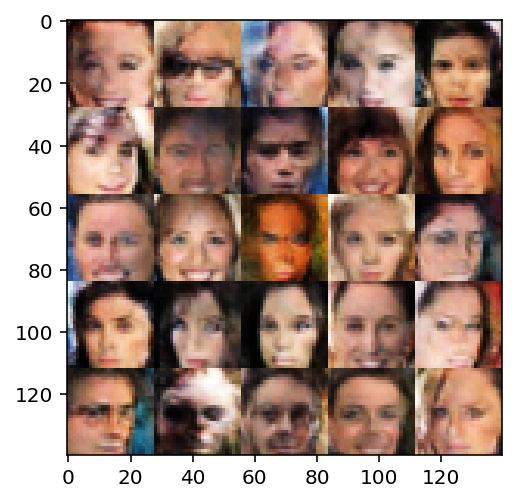

Epoch 1/1... Discriminator Loss: 0.8109... Generator Loss: 0.9034
Epoch 1/1... Discriminator Loss: 0.9117... Generator Loss: 0.7620
Epoch 1/1... Discriminator Loss: 1.1027... Generator Loss: 0.6244


In [121]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.4
rate = 0.2
#alpha = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

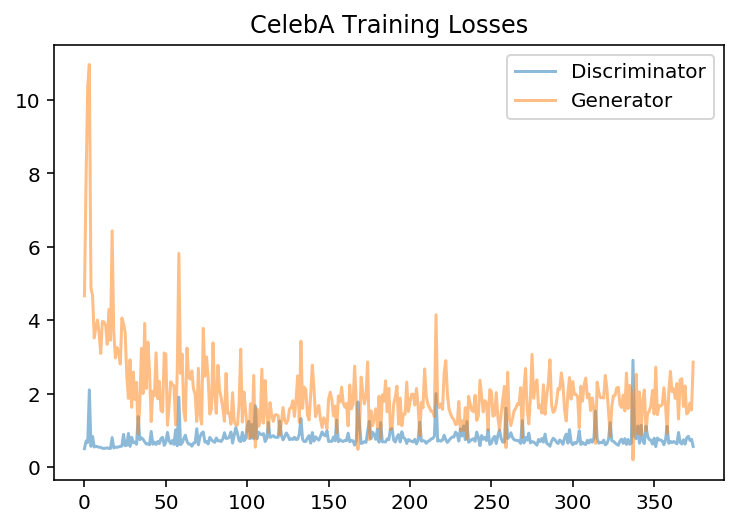

In [122]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("CelebA Training Losses")
plt.legend()

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.